In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/STAT208-GROUP7/Telco_customer_churn_New.xlsx'

In [ ]:
#import pandas as pd
#file_path = '/content/drive/My Drive/STAT208-GROUP 7/Telco_customer_churn_New.xlsx' # Ankit's setup DONT CHANGE, comment and use your own.


In [ ]:
df = pd.read_excel(file_path)

CLEANING DATA

In [ ]:
# Check the columns
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
# Check the type of each variable
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [ ]:
# Convert Total Charges to Float
column_to_convert = 'Total Charges'

df[column_to_convert] = pd.to_numeric(df[column_to_convert], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7037 entries, 0 to 7036
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7037 non-null   object 
 1   Count              7037 non-null   int64  
 2   Country            7037 non-null   object 
 3   State              7037 non-null   object 
 4   City               7037 non-null   object 
 5   Zip Code           7037 non-null   int64  
 6   Lat Long           7037 non-null   object 
 7   Latitude           7037 non-null   float64
 8   Longitude          7037 non-null   float64
 9   Gender             7037 non-null   object 
 10  Senior Citizen     7037 non-null   object 
 11  Partner            7037 non-null   object 
 12  Dependents         7037 non-null   object 
 13  Tenure Months      7037 non-null   int64  
 14  Phone Service      7037 non-null   object 
 15  Multiple Lines     7037 non-null   object 
 16  Internet Service   7037 

DAVIT'S CODE STARTS FROM HERE 😉


Visualization for categorical variables

In [ ]:
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Churn reason contains missing values which means customers stay with us not giving reasons for leaving. This code block deal with those mssing values
df['Churn Reason'] = df['Churn Reason'].fillna('Current Customer')
print(df['Churn Reason'].unique())

['Competitor made better offer' 'Moved' 'Competitor had better devices'
 'Competitor offered higher download speeds'
 'Competitor offered more data' 'Price too high' 'Product dissatisfaction'
 'Service dissatisfaction' 'Lack of self-service on Website'
 'Network reliability' 'Limited range of services'
 'Lack of affordable download/upload speed' 'Long distance charges'
 'Extra data charges' "Don't know" 'Poor expertise of online support'
 'Poor expertise of phone support' 'Attitude of service provider'
 'Attitude of support person' 'Deceased' 'Current Customer']


MAP FOR LAT AND LONGITUDE BY CHURN RATE

In [ ]:
# Group by Latitude', 'Longitude' and 'Churn Label' and count the occurrences
grouped = df.groupby(['Latitude','Longitude', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby(['Latitude','Longitude']).transform('sum')
churn_rate = round(grouped / total_counts, 2)
loc_ChurnLabel = pd.DataFrame({'churn_rate': churn_rate}).reset_index()

# Create a DataFrame with the total count
loc_counts = df.groupby(['Latitude','Longitude'])['CustomerID'].count().reset_index()
loc_counts.rename(columns={'CustomerID': 'count'}, inplace=True)

# Merge the City_ChurnLabel and city_counts DataFrames
loc_ChurnLabel = loc_ChurnLabel.merge(loc_counts, on=['Latitude','Longitude'])

# Filter out the rows where 'Churn Label' is 'No' and sort dataframe by count
loc_ChurnLabel = loc_ChurnLabel[loc_ChurnLabel['Churn Label'] == 'Yes']
loc_ChurnLabel = loc_ChurnLabel.sort_values(by='count', ascending=False)
loc_ChurnLabel.drop(columns='Churn Label', inplace=True)

loc_ChurnLabel.head()

,Latitude,Longitude,churn_rate,count
1,32.555828,-117.040073,0.2,5
667,34.037037,-118.705803,0.2,5
696,34.049841,-118.338460,0.2,5
690,34.048013,-118.293953,0.2,5
688,34.046220,-118.053753,0.2,5


In [ ]:
# Plot a map for Lat and Long
import plotly.express as px
fig = px.scatter_mapbox(loc_ChurnLabel,
                        lat="Latitude", lon='Longitude',
                        hover_data= ['churn_rate'], mapbox_style='open-street-map',
                        color="churn_rate"
        )
fig.update_layout(width=1000, height=600)
fig.show()

In [ ]:
df_cleaned_new = df.drop(['CustomerID', 'Country', 'Churn Label', 'State', 'Zip Code', 'Lat Long', 'Count'], axis=1)

VISUALIZATION FOR CATEGORICAL VARIABLES

The distribution of Churn Value

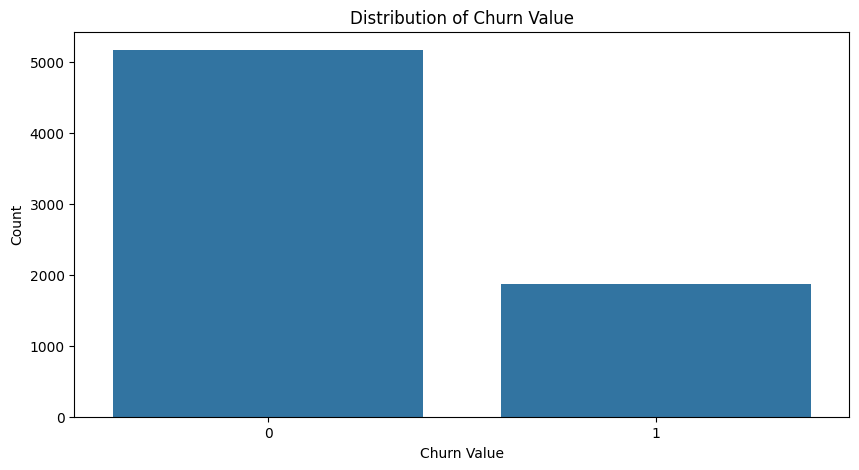

Churn Value
0    73.4%
1    26.6%
Name: proportion, dtype: object


In [ ]:
# Plot the distribution of Churn Value
plt.figure(figsize=(10, 5))
sns.countplot(x='Churn Value', data=df_cleaned_new)
plt.title('Distribution of Churn Value')
plt.xlabel('Churn Value')
plt.ylabel('Count')
plt.show()

# Calculate and print the ratio of Churn Value
churn_ratio = df_cleaned_new['Churn Value'].value_counts(normalize=True) * 100
print(churn_ratio.round(1).astype(str) + '%')

Distribution of other categorical variables by Churn Value

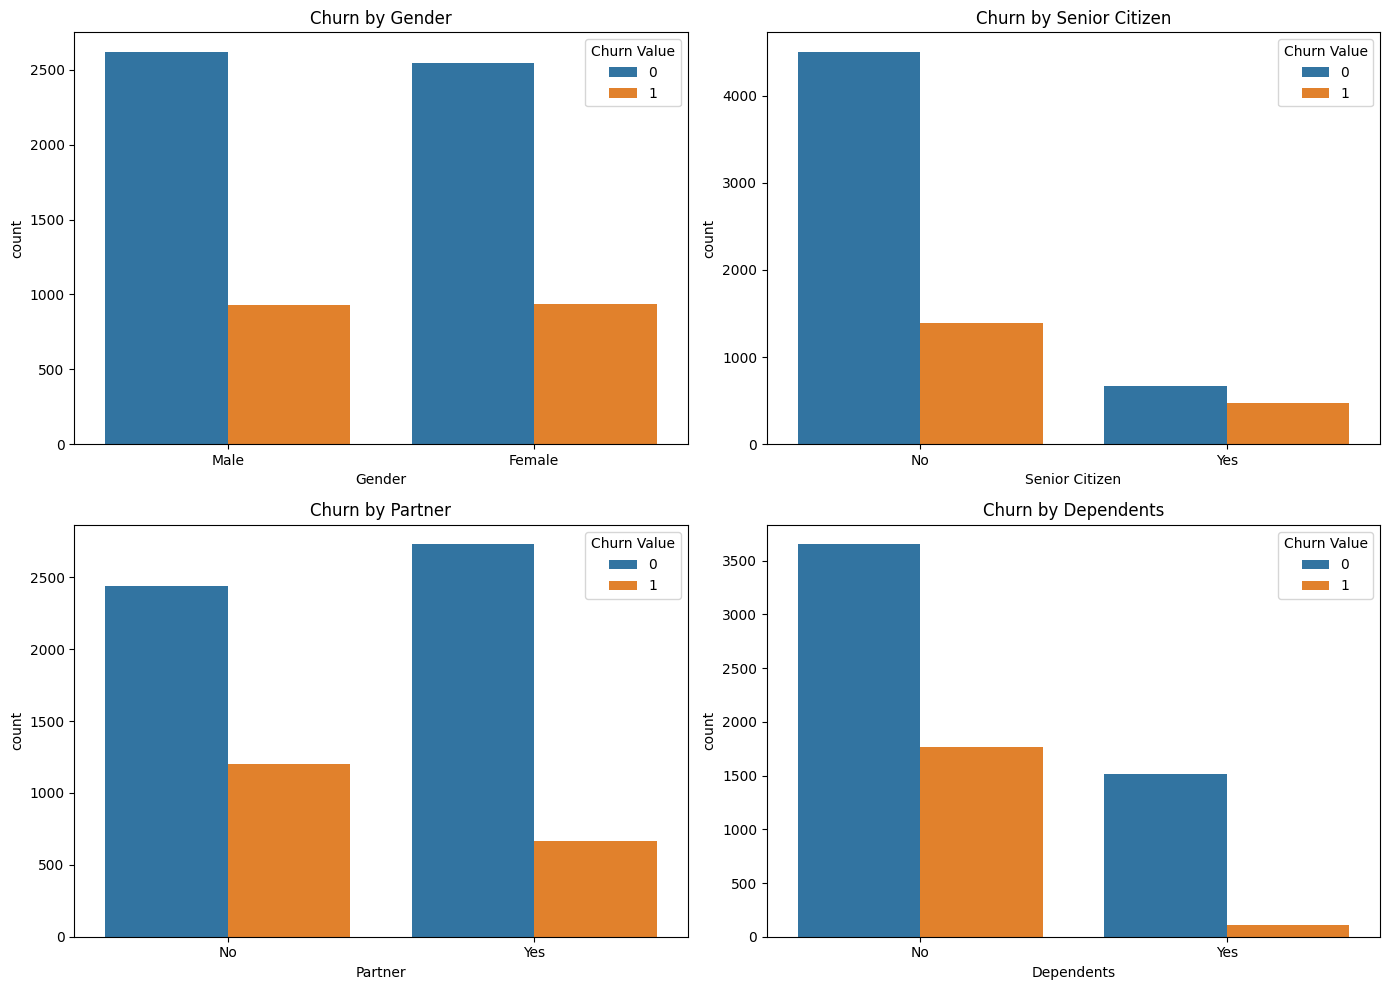

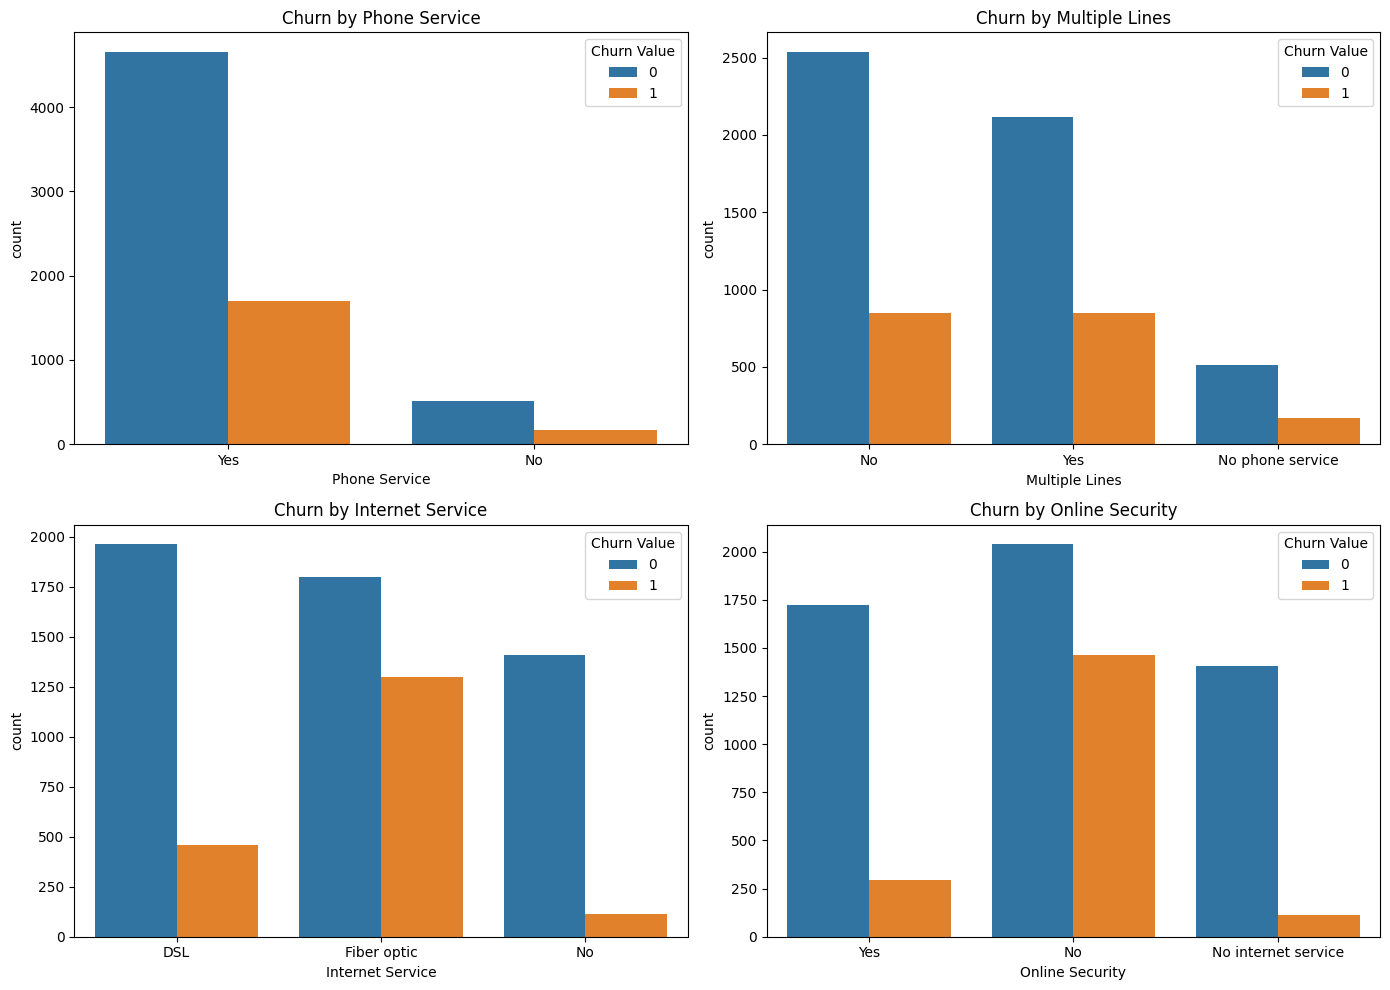

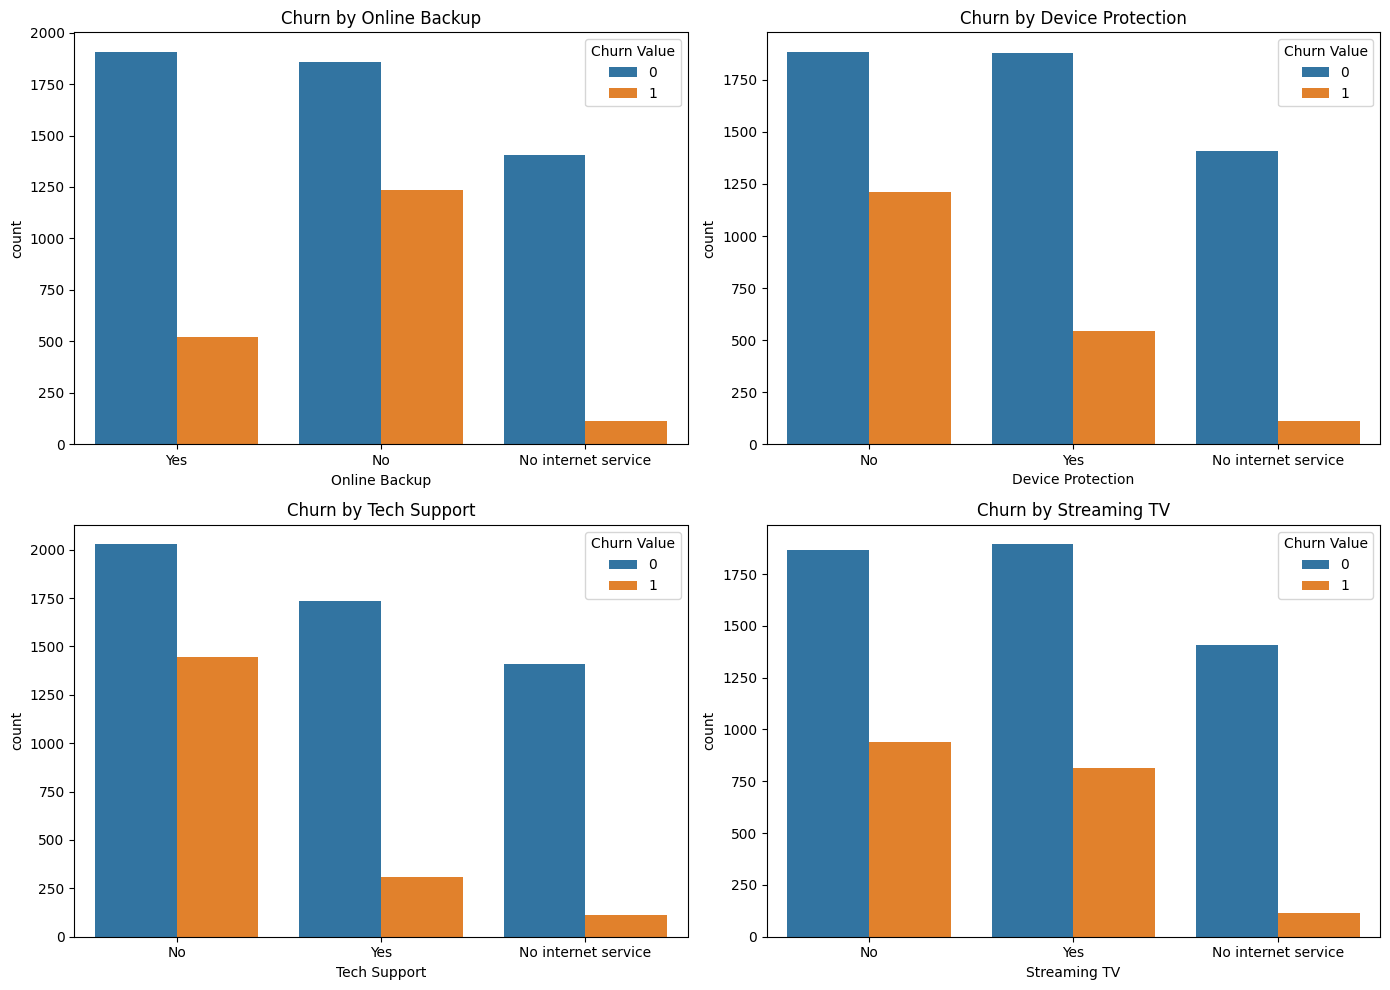

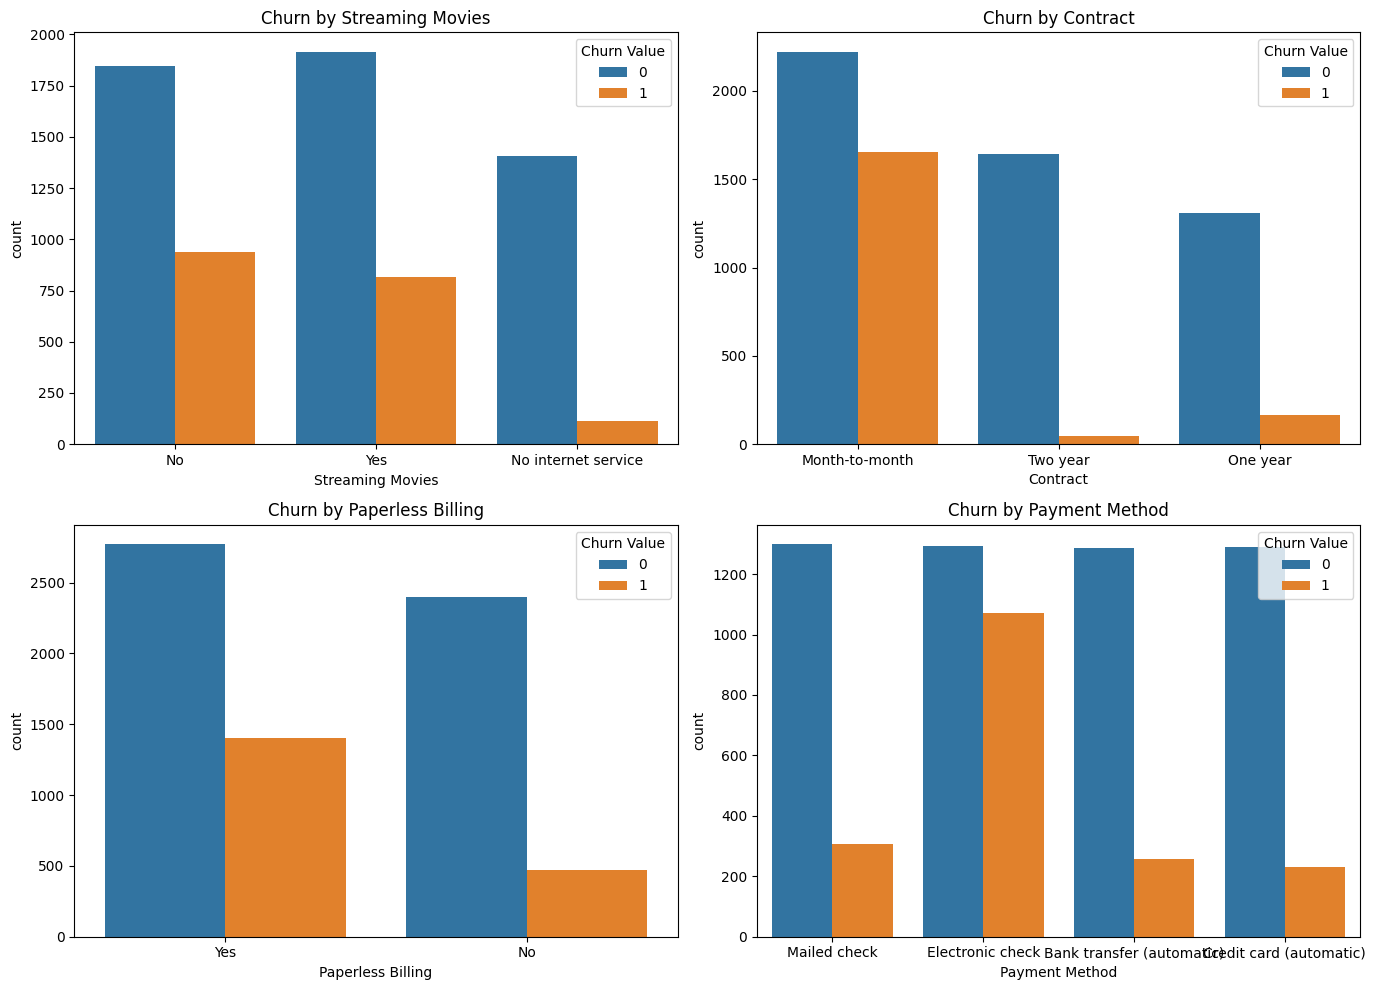

In [ ]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot the count of target variable per category in the desired form
sns.countplot(ax=axes[0, 0], data=df_cleaned_new, x='Gender', hue='Churn Value')
sns.countplot(ax=axes[0, 1], data=df_cleaned_new, x='Senior Citizen', hue='Churn Value')
sns.countplot(ax=axes[1, 0], data=df_cleaned_new, x='Partner', hue='Churn Value')
sns.countplot(ax=axes[1, 1], data=df_cleaned_new, x='Dependents', hue='Churn Value')



# Set plot titles
axes[0, 0].set_title('Churn by Gender')
axes[0, 1].set_title('Churn by Senior Citizen')
axes[1, 0].set_title('Churn by Partner')
axes[1, 1].set_title('Churn by Dependents')


# Show the plots
plt.tight_layout()
plt.show()

# Define the remaining categorical variables
remaining_categorical_vars = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
                              'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
                              'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Reason']

# Set up the matplotlib figure for the first set
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot the count of target variable per category in the desired form for the first four remaining variables
sns.countplot(ax=axes[0, 0], data=df_cleaned_new, x='Phone Service', hue='Churn Value')
sns.countplot(ax=axes[0, 1], data=df_cleaned_new, x='Multiple Lines', hue='Churn Value')
sns.countplot(ax=axes[1, 0], data=df_cleaned_new, x='Internet Service', hue='Churn Value')
sns.countplot(ax=axes[1, 1], data=df_cleaned_new, x='Online Security', hue='Churn Value')

# Set plot titles
axes[0, 0].set_title('Churn by Phone Service')
axes[0, 1].set_title('Churn by Multiple Lines')
axes[1, 0].set_title('Churn by Internet Service')
axes[1, 1].set_title('Churn by Online Security')

# Show the plots
plt.tight_layout()
plt.show()

# Set up the matplotlib figure for the second set
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot the count of target variable per category in the desired form for the next four remaining variables
sns.countplot(ax=axes[0, 0], data=df_cleaned_new, x='Online Backup', hue='Churn Value')
sns.countplot(ax=axes[0, 1], data=df_cleaned_new, x='Device Protection', hue='Churn Value')
sns.countplot(ax=axes[1, 0], data=df_cleaned_new, x='Tech Support', hue='Churn Value')
sns.countplot(ax=axes[1, 1], data=df_cleaned_new, x='Streaming TV', hue='Churn Value')

# Set plot titles
axes[0, 0].set_title('Churn by Online Backup')
axes[0, 1].set_title('Churn by Device Protection')
axes[1, 0].set_title('Churn by Tech Support')
axes[1, 1].set_title('Churn by Streaming TV')

# Show the plots
plt.tight_layout()
plt.show()

# Set up the matplotlib figure for the third set
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot the count of target variable per category in the desired form for the next four remaining variables
sns.countplot(ax=axes[0, 0], data=df_cleaned_new, x='Streaming Movies', hue='Churn Value')
sns.countplot(ax=axes[0, 1], data=df_cleaned_new, x='Contract', hue='Churn Value')
sns.countplot(ax=axes[1, 0], data=df_cleaned_new, x='Paperless Billing', hue='Churn Value')
sns.countplot(ax=axes[1, 1], data=df_cleaned_new, x='Payment Method', hue='Churn Value')

# Set plot titles
axes[0, 0].set_title('Churn by Streaming Movies')
axes[0, 1].set_title('Churn by Contract')
axes[1, 0].set_title('Churn by Paperless Billing')
axes[1, 1].set_title('Churn by Payment Method')

# Show the plots
plt.tight_layout()
plt.show()


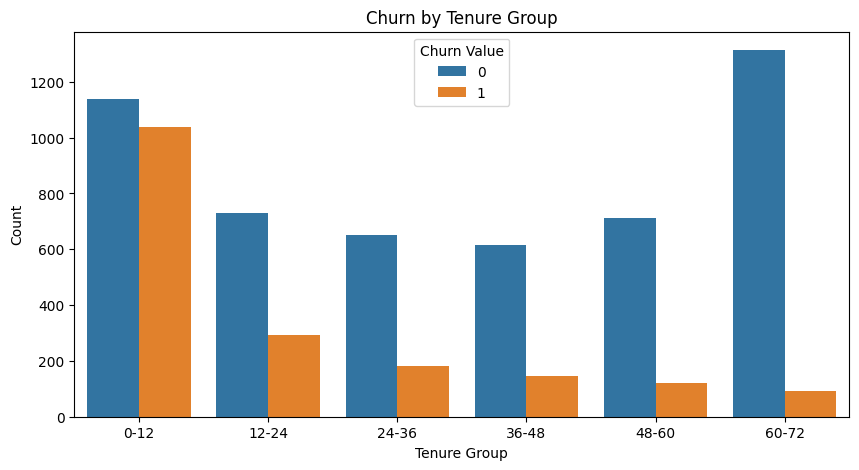

In [ ]:
# divide Tenure into 6 categories: 0-12, 12-24, 24-36, 36-48, 48-60, 60-72
df_cleaned_new['Tenure Group'] = pd.cut(df_cleaned_new['Tenure Months'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60-72'])
# # Plot the count of target variable per Tenrue Group
plt.figure(figsize=(10, 5))
sns.countplot(x='Tenure Group', data=df_cleaned_new, hue='Churn Value')
plt.title('Churn by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.show()


In [ ]:
# Calculate frequency of each reason and sort in descending order
reason_counts = df['Churn Reason'].value_counts().sort_values(ascending=True).head(20)
reason_counts_df = reason_counts.reset_index()
reason_counts_df.columns = ['Churn Reason', 'Count']

# Creating a vertical bar chart
fig = px.bar(reason_counts_df, x='Churn Reason', y='Count',
             text='Count',
             color='Count',  # Colors bars based on their count
             color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(
    xaxis_title="Churn Reason",
    yaxis_title="Count",
    xaxis={'categoryorder':'total descending'},  # Ensures bars are sorted by count
    coloraxis_colorbar=dict(title="Counts")  # Adjusts the color bar title
)

fig.update_traces(texttemplate='%{text}', textposition='outside')  # Adjusts text annotation formatting
fig.show()

In [ ]:
fig = px.box(df_cleaned_new, x='Monthly Charges', y='Churn Value', color='Churn Value',
             orientation='h', title='Churn Customers - Monthly Charges',
             width=800, height=400)  # Set width and height to fit your display or presentation requirements
fig.update_traces(marker=dict(size=4), width=0.6)  # Adjust marker size and box width
fig.update_layout(
    xaxis_title="Monthly Charges",
    yaxis_title="Churn Value",
    xaxis={'categoryorder':'total ascending'}  # Ensures that the axis categories are sorted if needed
)
fig.show()





In [ ]:
fig = px.box(df_cleaned_new, x='Tenure Months', y='Churn Value', color='Churn Value',
             orientation='h', title='Churn Customers - Tenure Months',
             width=800, height=400)  # Match the dimensions to keep consistency across plots
fig.update_traces(marker=dict(size=4), width=0.6)  # Consistent marker size and box width
fig.update_layout(
    xaxis_title="Tenure Months",
    yaxis_title="Churn Value",
    xaxis={'categoryorder':'total ascending'}  # Optional, for sorting
)
fig.show()

In [ ]:
fig = px.box(df_cleaned_new, x='Total Charges', y='Churn Value', color='Churn Value',
             orientation='h', title='Churn Customers - Total Charges',
             width=800, height=400)  # Match the dimensions to keep consistency across plots
fig.update_traces(marker=dict(size=4), width=0.6)  # Consistent marker size and box width
fig.update_layout(
    xaxis_title="Total Charges",
    yaxis_title="Churn Value",
    xaxis={'categoryorder':'total ascending'}  # Optional, for sorting
)
fig.show()


In [ ]:
fig = px.box(df_cleaned_new, x='CLTV', y='Churn Value', color='Churn Value',
             orientation='h', title='Churn Customers - CLTV',
             width=800, height=400)  # Match the dimensions to keep consistency across plots
fig.update_traces(marker=dict(size=4), width=0.6)  # Consistent marker size and box width
fig.update_layout(
    xaxis_title="CLTV",
    yaxis_title="Churn Value",
    xaxis={'categoryorder':'total ascending'}  # Optional, for sorting
)
fig.show()

VISUALIZATION FOR NUMERICAL VARIABLES

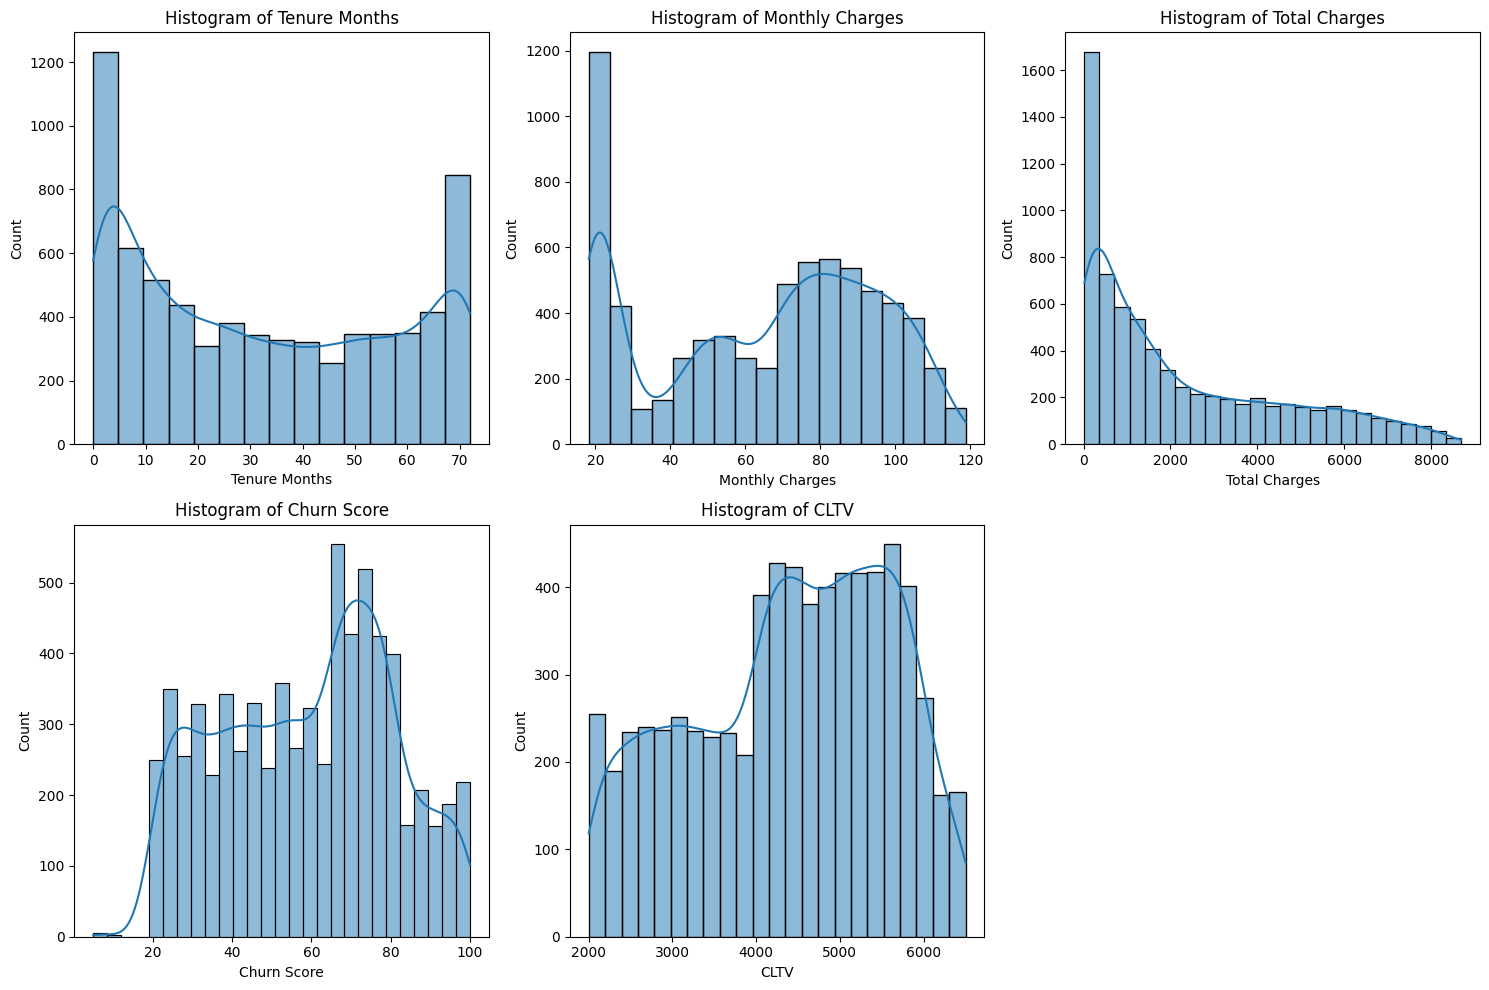

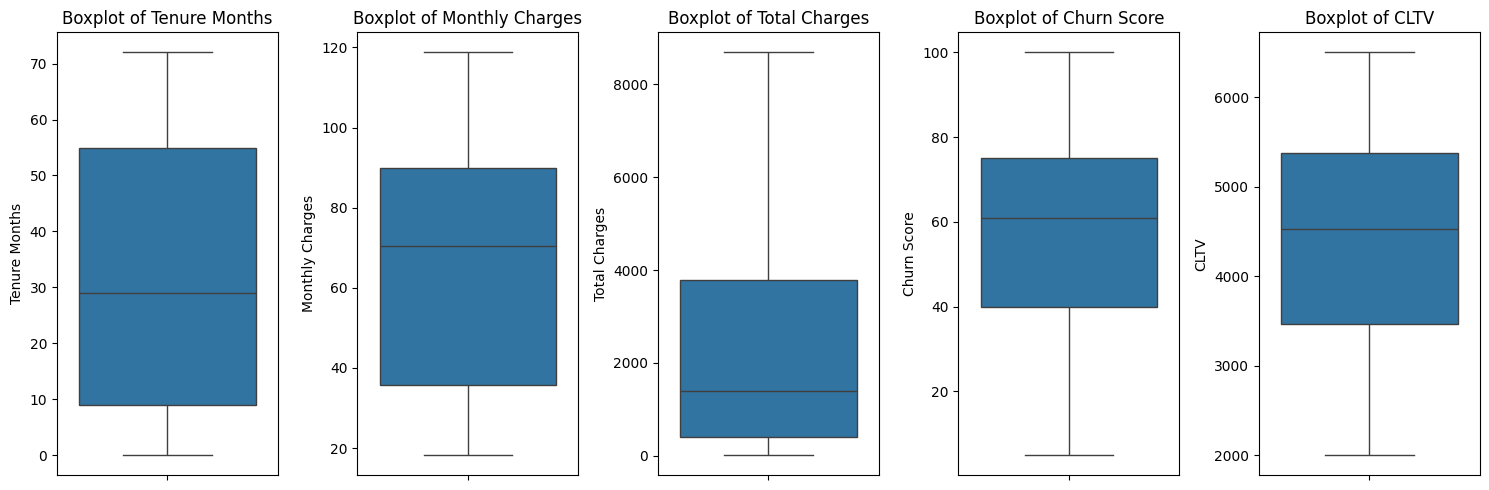

In [ ]:
# List of numerical variables
numerical_vars = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']

# Setting up the visualization - adjust the figure size as needed
plt.figure(figsize=(15, 10))
# Loop through the list of numerical variables and create a histogram for each
for i, var in enumerate(numerical_vars):
    plt.subplot(2, 3, i + 1)  # Adjust subplot grid based on the number of variables
    sns.histplot(df_cleaned_new[var], kde=True)
    plt.title(f'Histogram of {var}')
# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Setting up the visualization - adjust the figure size as needed
plt.figure(figsize=(15, 5))
# Loop through the list of numerical variables and create a boxplot for each
for i, var in enumerate(numerical_vars):
    plt.subplot(1, 5, i + 1)  # Adjust subplot grid based on the number of variables
    sns.boxplot(data=df_cleaned_new, y=var)
    plt.title(f'Boxplot of {var}')
# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

HEATMAP FOR NUMERICAL VARIABLES

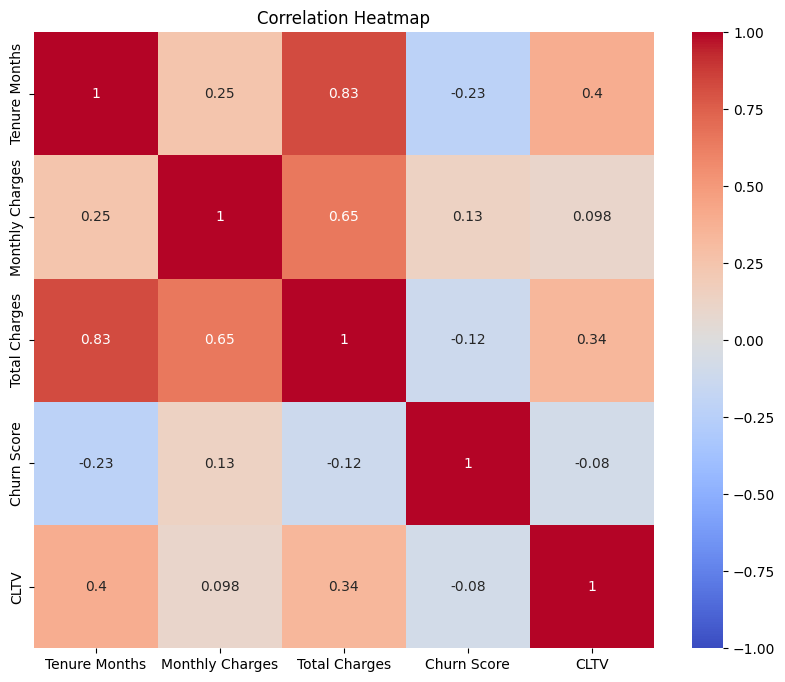

In [ ]:
corr_df = df_cleaned_new[numerical_vars]
corr = corr_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

COVERTING CATEGORICAL TO NUMERICAL VARIABLES EXCEPT "CITY" AND "CHURN REASON"

In [ ]:
# create a new dataset to converting varaibles
df_converting = df_cleaned_new
df_cleaned_new

,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason,Tenure Group
0,Los Angeles,33.964131,-118.272783,Male,No,No,No,2,Yes,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer,0-12
1,Los Angeles,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved,0-12
2,Los Angeles,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,...,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372,Moved,0-12
3,Los Angeles,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,...,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved,24-36
4,Los Angeles,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340,Competitor had better devices,48-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,Landers,34.341737,-116.539416,Female,No,No,No,72,Yes,No,...,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,45,5306,Current Customer,60-72
7033,Adelanto,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,...,One year,Yes,Mailed check,84.80,1990.50,0,59,2140,Current Customer,12-24
7034,Amboy,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,...,One year,Yes,Credit card (automatic),103.20,7362.90,0,71,5560,Current Customer,60-72
7035,Angelus Oaks,34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,...,Month-to-month,Yes,Electronic check,29.60,346.45,0,59,2793,Current Customer,0-12


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

CATEGORIZE CITY INTO THE SOUTH AND NORTH CALIFORNIA

In [ ]:
#import pandas as pd

# Define the boundary latitude
BOUNDARY_LATITUDE = 35.5

def get_california_region(latitude, longitude):
    """
    Returns 'North California' if the latitude is above the boundary,
    'South California' otherwise.
    """
    if latitude >= BOUNDARY_LATITUDE:
        return 'North California'
    else:
        return 'South California'

# Assuming your dataframe is called 'df' and has columns 'City', 'Latitude', 'Longitude'
df_converting['Categorized_cities'] = df_converting.apply(lambda row: get_california_region(row['Latitude'], row['Longitude']), axis=1)
#df_converting

CATEGORIZE CHURN REASON INTO 5 COMMON DIFFERENT REASONS

In [ ]:
cate_churn = {
    "Competitor Reasons": [
        "Competitor made better offer", "Competitor had better devices",
        "Competitor offered higher download speeds", "Competitor offered more data"
    ],
    "Cost Issues": [
        "Price too high", "Long distance charges", "Extra data charges"
    ],
    "Service Quality Issues": [
        "Product dissatisfaction", "Service dissatisfaction", "Network reliability",
        "Limited range of services", "Lack of affordable download/upload speed"
    ],
    "Support and Attitude Issues": [
        "Lack of self-service on Website", "Poor expertise of online support",
        "Poor expertise of phone support", "Attitude of service provider",
        "Attitude of support person", "Deceased", "Don't know"
    ]
}
def assign_category(reason, cate_churn):
    for category, reasons in cate_churn.items():
        if reason in reasons:
            return category
    return "Other"

# Test the function
# test_reason = ""
# print(assign_category(test_reason, cate_churn))


In [ ]:
# Apply the categorization function
df_converting['Churn Category'] = df_converting['Churn Reason'].apply(lambda x: assign_category(x, cate_churn))

# Check the result
#print(df_converting[['Churn Reason', 'Churn Category']].head())
df_converting

,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason,Tenure Group,Categorized_cities,Churn Category
0,Los Angeles,33.964131,-118.272783,Male,No,No,No,2,Yes,No,...,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer,0-12,South California,Competitor Reasons
1,Los Angeles,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,...,Electronic check,70.70,151.65,1,67,2701,Moved,0-12,South California,Other
2,Los Angeles,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,...,Electronic check,99.65,820.50,1,86,5372,Moved,0-12,South California,Other
3,Los Angeles,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,...,Electronic check,104.80,3046.05,1,84,5003,Moved,24-36,South California,Other
4,Los Angeles,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,...,Bank transfer (automatic),103.70,5036.30,1,89,5340,Competitor had better devices,48-60,South California,Competitor Reasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,Landers,34.341737,-116.539416,Female,No,No,No,72,Yes,No,...,Bank transfer (automatic),21.15,1419.40,0,45,5306,Current Customer,60-72,South California,Other
7033,Adelanto,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,...,Mailed check,84.80,1990.50,0,59,2140,Current Customer,12-24,South California,Other
7034,Amboy,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,...,Credit card (automatic),103.20,7362.90,0,71,5560,Current Customer,60-72,South California,Other
7035,Angelus Oaks,34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,...,Electronic check,29.60,346.45,0,59,2793,Current Customer,0-12,South California,Other


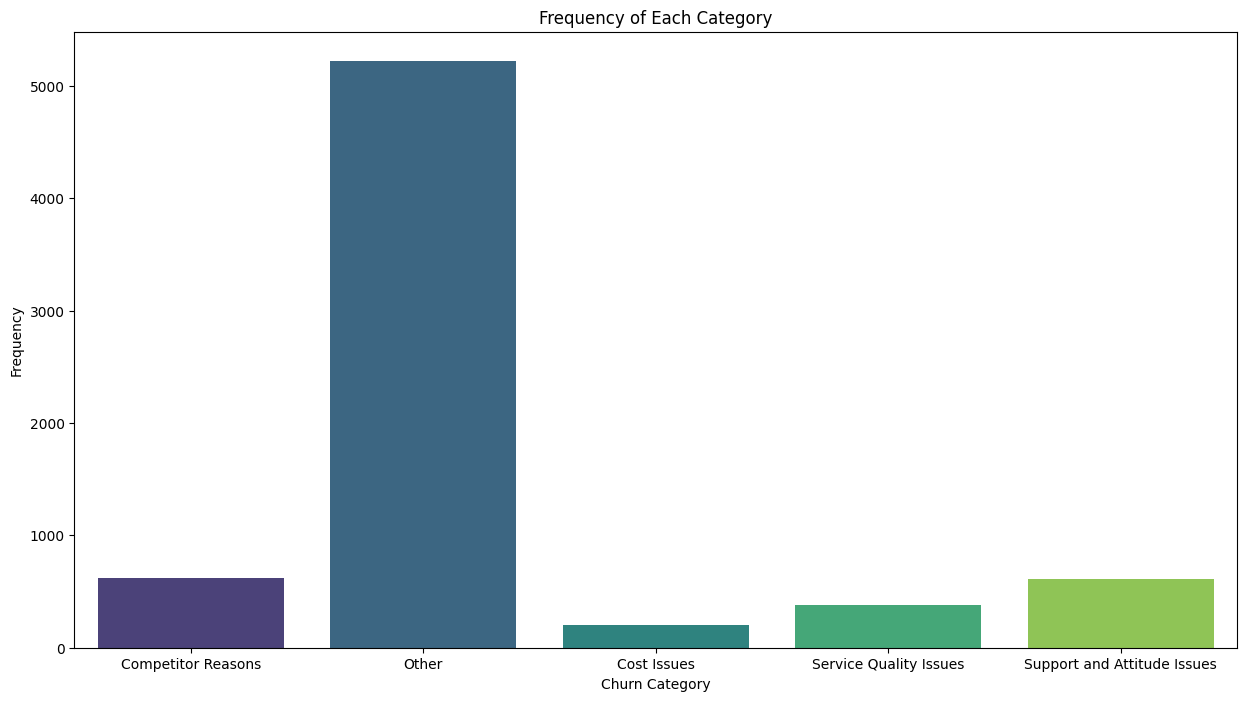

In [ ]:
# Plot a chart for new churn catagories
plt.figure(figsize=(15, 8))
# Use the 'hue' parameter and set legend to False as recommended
sns.countplot(x='Churn Category', hue='Churn Category', data=df_converting, palette='viridis', legend=False)
plt.title('Frequency of Each Category')
plt.xlabel('Churn Category')
plt.ylabel('Frequency')
# Remove the legend explicitly if it still appears
plt.legend([], frameon=False)
plt.show()

In [ ]:
df_converting_new = df_converting.drop(['City', 'Latitude', 'Longitude', 'Churn Score', 'Churn Reason'], axis = 1)
# df_converting = pd.get_dummies(df_converting, columns=['Gender', 'Senior Citizen', 'Partner', 'Dependents',
#        'Phone Service', 'Multiple Lines', 'Internet Service',
#        'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
#        'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
#        'Payment Method'], drop_first=True)
# df_converting =
# df_converting
# # Initialize the OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False)

# # Fit and transform the column
# encoded_features = encoder.fit_transform(df_converting[['Gender', 'Senior Citizen', 'Partner', 'Dependents',
#        'Phone Service', 'Multiple Lines', 'Internet Service',
#        'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
#        'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
#        'Payment Method']])
# encoded_columns = encoder.get_feature_names_out()
# df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns)
# df_converting = pd.concat([df_converting.reset_index(drop=True), df_encoded], axis=1)
df_converting_new

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV,Tenure Group,Categorized_cities,Churn Category
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239,0-12,South California,Competitor Reasons
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701,0-12,South California,Other
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,99.65,820.50,1,5372,0-12,South California,Other
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003,24-36,South California,Other
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,5340,48-60,South California,Competitor Reasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,...,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,5306,60-72,South California,Other
7033,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,One year,Yes,Mailed check,84.80,1990.50,0,2140,12-24,South California,Other
7034,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,One year,Yes,Credit card (automatic),103.20,7362.90,0,5560,60-72,South California,Other
7035,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Month-to-month,Yes,Electronic check,29.60,346.45,0,2793,0-12,South California,Other


In [ ]:
df_converting_model_dummies = pd.get_dummies(df_converting_new, columns=['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Categorized_cities', 'Churn Category'], drop_first=True)

# # Initialize the OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False)

# # Fit and transform the column
# encoded_features = encoder.fit_transform(df_converting[['Gender', 'Senior Citizen', 'Partner', 'Dependents',
#        'Phone Service', 'Multiple Lines', 'Internet Service',
#        'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
#        'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
#        'Payment Method', 'Categorized_cities', 'Churn Category']])
# # encoded_columns = encoder.get_feature_names_out()
# df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns)
# df_converting = pd.concat([df_converting.reset_index(drop=True), df_encoded], axis=1)
df_converting_model_dummies

,Tenure Months,Monthly Charges,Total Charges,Churn Value,CLTV,Tenure Group,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,...,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Categorized_cities_South California,Churn Category_Cost Issues,Churn Category_Other,Churn Category_Service Quality Issues,Churn Category_Support and Attitude Issues
0,2,53.85,108.15,1,3239,0-12,True,False,False,False,...,False,True,False,False,True,True,False,False,False,False
1,2,70.70,151.65,1,2701,0-12,False,False,False,True,...,False,True,False,True,False,True,False,True,False,False
2,8,99.65,820.50,1,5372,0-12,False,False,False,True,...,False,True,False,True,False,True,False,True,False,False
3,28,104.80,3046.05,1,5003,24-36,False,False,True,True,...,False,True,False,True,False,True,False,True,False,False
4,49,103.70,5036.30,1,5340,48-60,True,False,False,True,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,72,21.15,1419.40,0,5306,60-72,False,False,False,False,...,True,True,False,False,False,True,False,True,False,False
7033,24,84.80,1990.50,0,2140,12-24,True,False,True,True,...,False,True,False,False,True,True,False,True,False,False
7034,72,103.20,7362.90,0,5560,60-72,False,False,True,True,...,False,True,True,False,False,True,False,True,False,False
7035,11,29.60,346.45,0,2793,0-12,False,False,True,True,...,False,True,False,True,False,True,False,True,False,False


In [ ]:
df_letsgo = pd.DataFrame(df_converting_model_dummies)

bool_columns = df_letsgo.select_dtypes(include=['bool']).columns

# Convert boolean columns to binary
df_letsgo[bool_columns] = df_letsgo[bool_columns].astype(int)


# Display the result
df_letsgo

,Tenure Months,Monthly Charges,Total Charges,Churn Value,CLTV,Tenure Group,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,...,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Categorized_cities_South California,Churn Category_Cost Issues,Churn Category_Other,Churn Category_Service Quality Issues,Churn Category_Support and Attitude Issues
0,2,53.85,108.15,1,3239,0-12,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,2,70.70,151.65,1,2701,0-12,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
2,8,99.65,820.50,1,5372,0-12,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
3,28,104.80,3046.05,1,5003,24-36,0,0,1,1,...,0,1,0,1,0,1,0,1,0,0
4,49,103.70,5036.30,1,5340,48-60,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,72,21.15,1419.40,0,5306,60-72,0,0,0,0,...,1,1,0,0,0,1,0,1,0,0
7033,24,84.80,1990.50,0,2140,12-24,1,0,1,1,...,0,1,0,0,1,1,0,1,0,0
7034,72,103.20,7362.90,0,5560,60-72,0,0,1,1,...,0,1,1,0,0,1,0,1,0,0
7035,11,29.60,346.45,0,2793,0-12,0,0,1,1,...,0,1,0,1,0,1,0,1,0,0


In [ ]:
df_letsgo.columns

Index(['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'CLTV', 'Tenure Group', 'Gender_Male', 'Senior Citizen_Yes',
       'Partner_Yes', 'Dependents_Yes', 'Phone Service_Yes',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No internet service', 'Online Security_Yes',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No internet service', 'Device Protection_Yes',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Streaming TV_No internet service', 'Streaming TV_Yes',
       'Streaming Movies_No internet service', 'Streaming Movies_Yes',
       'Contract_One year', 'Contract_Two year', 'Paperless Billing_Yes',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check',
       'Categorized_cities_South California', 'Churn Category_Cost Iss

**MODELS START HERE**

imputing value with mean :

In [ ]:
wer = df_letsgo.isnull().sum()
wer

Tenure Months                                 0
Monthly Charges                               0
Total Charges                                 5
Churn Value                                   0
CLTV                                          0
Tenure Group                                  5
Gender_Male                                   0
Senior Citizen_Yes                            0
Partner_Yes                                   0
Dependents_Yes                                0
Phone Service_Yes                             0
Multiple Lines_No phone service               0
Multiple Lines_Yes                            0
Internet Service_Fiber optic                  0
Internet Service_No                           0
Online Security_No internet service           0
Online Security_Yes                           0
Online Backup_No internet service             0
Online Backup_Yes                             0
Device Protection_No internet service         0
Device Protection_Yes                   

In [ ]:
# Fill missing values with the mean of the column
df_letsgo['Total Charges'] = df_letsgo['Total Charges'].fillna(df_letsgo['Total Charges'].mean())

# Check if there are any missing values left
print(df_letsgo.isnull().sum())


In [ ]:
df_letsgo

,Tenure Months,Monthly Charges,Total Charges,Churn Value,CLTV,Tenure Group,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,...,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Categorized_cities_South California,Churn Category_Cost Issues,Churn Category_Other,Churn Category_Service Quality Issues,Churn Category_Support and Attitude Issues
0,2,53.85,108.15,1,3239,0-12,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,2,70.70,151.65,1,2701,0-12,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
2,8,99.65,820.50,1,5372,0-12,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
3,28,104.80,3046.05,1,5003,24-36,0,0,1,1,...,0,1,0,1,0,1,0,1,0,0
4,49,103.70,5036.30,1,5340,48-60,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,72,21.15,1419.40,0,5306,60-72,0,0,0,0,...,1,1,0,0,0,1,0,1,0,0
7033,24,84.80,1990.50,0,2140,12-24,1,0,1,1,...,0,1,0,0,1,1,0,1,0,0
7034,72,103.20,7362.90,0,5560,60-72,0,0,1,1,...,0,1,1,0,0,1,0,1,0,0
7035,11,29.60,346.45,0,2793,0-12,0,0,1,1,...,0,1,0,1,0,1,0,1,0,0


In [ ]:
df_final_drop = df_letsgo

In [ ]:
df_final_drop

,Tenure Months,Monthly Charges,Total Charges,Churn Value,CLTV,Tenure Group,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,...,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Categorized_cities_South California,Churn Category_Cost Issues,Churn Category_Other,Churn Category_Service Quality Issues,Churn Category_Support and Attitude Issues
0,2,53.85,108.15,1,3239,0-12,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,2,70.70,151.65,1,2701,0-12,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
2,8,99.65,820.50,1,5372,0-12,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
3,28,104.80,3046.05,1,5003,24-36,0,0,1,1,...,0,1,0,1,0,1,0,1,0,0
4,49,103.70,5036.30,1,5340,48-60,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,72,21.15,1419.40,0,5306,60-72,0,0,0,0,...,1,1,0,0,0,1,0,1,0,0
7033,24,84.80,1990.50,0,2140,12-24,1,0,1,1,...,0,1,0,0,1,1,0,1,0,0
7034,72,103.20,7362.90,0,5560,60-72,0,0,1,1,...,0,1,1,0,0,1,0,1,0,0
7035,11,29.60,346.45,0,2793,0-12,0,0,1,1,...,0,1,0,1,0,1,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

df_final_drop_scaled = pd.DataFrame(df_final_drop)

# Columns to scale
columns_to_scale = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler only to the columns we want to scale and transform them
df_final_drop_scaled[columns_to_scale] = scaler.fit_transform(df_final_drop_scaled[columns_to_scale])

# Display the result
df_final_drop_scaled

,Tenure Months,Monthly Charges,Total Charges,Churn Value,CLTV,Tenure Group,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,...,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Categorized_cities_South California,Churn Category_Cost Issues,Churn Category_Other,Churn Category_Service Quality Issues,Churn Category_Support and Attitude Issues
0,-1.238238,-0.364040,-0.959990,1,-0.982225,0-12,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,-1.238238,0.196236,-0.940792,1,-1.437101,0-12,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
2,-0.993839,1.158846,-0.645599,1,0.821212,0-12,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
3,-0.179175,1.330087,0.336635,1,0.509225,24-36,0,0,1,1,...,0,1,0,1,0,1,0,1,0,0
4,0.676222,1.293512,1.215021,1,0.794156,48-60,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,1.613086,-1.451340,-0.381278,0,0.765409,60-72,0,0,0,0,...,1,1,0,0,0,1,0,1,0,0
7033,-0.342108,0.665072,-0.129226,0,-1.911423,12-24,1,0,1,1,...,0,1,0,0,1,1,0,1,0,0
7034,1.613086,1.276886,2.241852,0,0.980165,60-72,0,0,1,1,...,0,1,1,0,0,1,0,1,0,0
7035,-0.871640,-1.170371,-0.854818,0,-1.359315,0-12,0,0,1,1,...,0,1,0,1,0,1,0,1,0,0


In [ ]:
df_final_drop = df_final_drop_scaled
df_final_drop

,Tenure Months,Monthly Charges,Total Charges,Churn Value,CLTV,Tenure Group,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,...,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Categorized_cities_South California,Churn Category_Cost Issues,Churn Category_Other,Churn Category_Service Quality Issues,Churn Category_Support and Attitude Issues
0,-1.238238,-0.364040,-0.959990,1,-0.982225,0-12,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,-1.238238,0.196236,-0.940792,1,-1.437101,0-12,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
2,-0.993839,1.158846,-0.645599,1,0.821212,0-12,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
3,-0.179175,1.330087,0.336635,1,0.509225,24-36,0,0,1,1,...,0,1,0,1,0,1,0,1,0,0
4,0.676222,1.293512,1.215021,1,0.794156,48-60,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,1.613086,-1.451340,-0.381278,0,0.765409,60-72,0,0,0,0,...,1,1,0,0,0,1,0,1,0,0
7033,-0.342108,0.665072,-0.129226,0,-1.911423,12-24,1,0,1,1,...,0,1,0,0,1,1,0,1,0,0
7034,1.613086,1.276886,2.241852,0,0.980165,60-72,0,0,1,1,...,0,1,1,0,0,1,0,1,0,0
7035,-0.871640,-1.170371,-0.854818,0,-1.359315,0-12,0,0,1,1,...,0,1,0,1,0,1,0,1,0,0


In [ ]:
df_final_drop_v1 = df_final_drop.drop(['Churn Category_Cost Issues', 'Churn Category_Other', 'Churn Category_Service Quality Issues', 'Churn Category_Support and Attitude Issues'], axis = 1)
df_final_drop_v1

,Tenure Months,Monthly Charges,Total Charges,Churn Value,CLTV,Tenure Group,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,...,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Categorized_cities_South California
0,-1.238238,-0.364040,-0.959990,1,-0.982225,0-12,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,-1.238238,0.196236,-0.940792,1,-1.437101,0-12,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
2,-0.993839,1.158846,-0.645599,1,0.821212,0-12,0,0,0,1,...,1,0,1,0,0,1,0,1,0,1
3,-0.179175,1.330087,0.336635,1,0.509225,24-36,0,0,1,1,...,1,0,1,0,0,1,0,1,0,1
4,0.676222,1.293512,1.215021,1,0.794156,48-60,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,1.613086,-1.451340,-0.381278,0,0.765409,60-72,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
7033,-0.342108,0.665072,-0.129226,0,-1.911423,12-24,1,0,1,1,...,1,0,1,1,0,1,0,0,1,1
7034,1.613086,1.276886,2.241852,0,0.980165,60-72,0,0,1,1,...,1,0,1,1,0,1,1,0,0,1
7035,-0.871640,-1.170371,-0.854818,0,-1.359315,0-12,0,0,1,1,...,0,0,0,0,0,1,0,1,0,1


In [ ]:
df_final_drop_v1 = df_final_drop_v1.drop(['Tenure Group'], axis = 1)

In [ ]:
df_final_drop = df_final_drop_v1

1. Train-Test Split:

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df_final_drop.drop(columns=['Churn Value', 'CLTV'])
y_churn = df_final_drop['Churn Value']
y_cltv = df_final_drop['CLTV']

# Split the data into training and testing sets
X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(X, y_churn, test_size=0.2, random_state=42)
X_train_cltv, X_test_cltv, y_train_cltv, y_test_cltv = train_test_split(X, y_cltv, test_size=0.2, random_state=42)


2. Logistic Regression (for Churn Prediction):

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_churn, y_train_churn)

# Predict and evaluate
y_pred_churn = logreg.predict(X_test_churn)
print("Logistic Regression - Churn Prediction")
print(f"Accuracy: {accuracy_score(y_test_churn, y_pred_churn):.2f}")
print(f"Precision: {precision_score(y_test_churn, y_pred_churn):.2f}")
print(f"Recall: {recall_score(y_test_churn, y_pred_churn):.2f}")
print(f"F1 Score: {f1_score(y_test_churn, y_pred_churn):.2f}")


Logistic Regression - Churn Prediction
Accuracy: 0.81
Precision: 0.70
Recall: 0.58
F1 Score: 0.63



Logistic Regression Coefficients and Odds Ratios
                                   Feature  Coefficient  Odds Ratio
0                            Tenure Months    -1.460234    0.232182
6                           Dependents_Yes    -1.442393    0.236362
25                       Contract_Two year    -1.328400    0.264901
10            Internet Service_Fiber optic     0.698150    2.010031
24                       Contract_One year    -0.645010    0.524658
2                            Total Charges     0.641251    1.898855
26                   Paperless Billing_Yes     0.377323    1.458375
13                     Online Security_Yes    -0.355573    0.700772
19                        Tech Support_Yes    -0.305271    0.736923
8          Multiple Lines_No phone service     0.275717    1.317475
7                        Phone Service_Yes    -0.266999    0.765674
5                              Partner_Yes     0.263694    1.301729
28         Payment Method_Electronic check     0.263685    1.30171

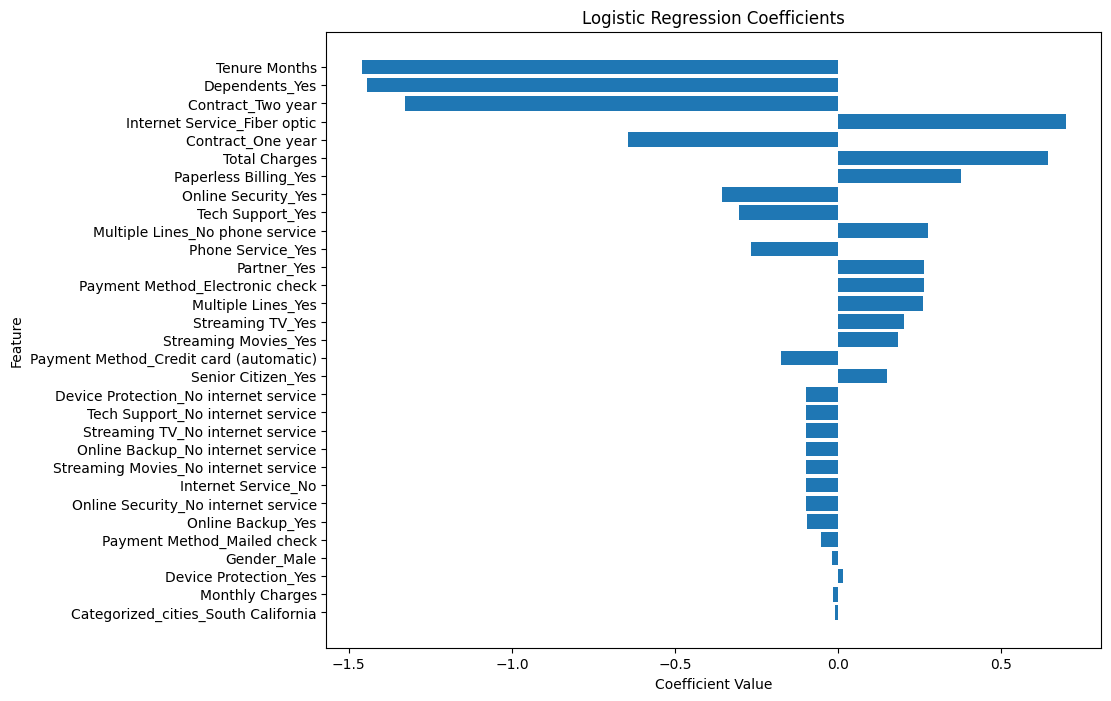

In [ ]:
 # Extracting coefficients
coefficients = logreg.coef_[0]
feature_names = X_train_churn.columns

# Create a DataFrame for easy interpretation
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Adding odds ratios for better interpretation
coefficients_df['Odds Ratio'] = np.exp(coefficients_df['Coefficient'])

# Sorting by absolute value of coefficient
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

print("\nLogistic Regression Coefficients and Odds Ratios")
print(coefficients_df)

# Optional: Visualize the coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
coefficients = logreg.coef_[0]
feature_importance = np.abs(coefficients)
feature_names = X_train_churn.columns

log_reg_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(log_reg_feature_importance)

                                   Feature  Importance
0                            Tenure Months    1.460234
6                           Dependents_Yes    1.442393
25                       Contract_Two year    1.328400
10            Internet Service_Fiber optic    0.698150
24                       Contract_One year    0.645010
2                            Total Charges    0.641251
26                   Paperless Billing_Yes    0.377323
13                     Online Security_Yes    0.355573
19                        Tech Support_Yes    0.305271
8          Multiple Lines_No phone service    0.275717
7                        Phone Service_Yes    0.266999
5                              Partner_Yes    0.263694
28         Payment Method_Electronic check    0.263685
9                       Multiple Lines_Yes    0.260801
21                        Streaming TV_Yes    0.200758
23                    Streaming Movies_Yes    0.184045
27  Payment Method_Credit card (automatic)    0.175914
4         

Random Forest (for Churn Prediction):

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_churn, y_train_churn)

# Predict and evaluate
y_pred_rf_churn = rf.predict(X_test_churn)
print("Random Forest - Churn Prediction")
print(f"Accuracy: {accuracy_score(y_test_churn, y_pred_rf_churn):.2f}")
print(f"Precision: {precision_score(y_test_churn, y_pred_rf_churn):.2f}")
print(f"Recall: {recall_score(y_test_churn, y_pred_rf_churn):.2f}")
print(f"F1 Score: {f1_score(y_test_churn, y_pred_rf_churn):.2f}")


Random Forest - Churn Prediction
Accuracy: 0.79
Precision: 0.68
Recall: 0.51
F1 Score: 0.58



Random Forest Feature Importances
                                   Feature  Importance
2                            Total Charges    0.180785
0                            Tenure Months    0.170647
1                          Monthly Charges    0.158814
10            Internet Service_Fiber optic    0.038909
6                           Dependents_Yes    0.037137
28         Payment Method_Electronic check    0.034240
30     Categorized_cities_South California    0.028737
25                       Contract_Two year    0.028324
3                              Gender_Male    0.027428
26                   Paperless Billing_Yes    0.025141
5                              Partner_Yes    0.024240
13                     Online Security_Yes    0.023867
19                        Tech Support_Yes    0.021553
24                       Contract_One year    0.021344
4                       Senior Citizen_Yes    0.020618
15                       Online Backup_Yes    0.019989
9                       Multip

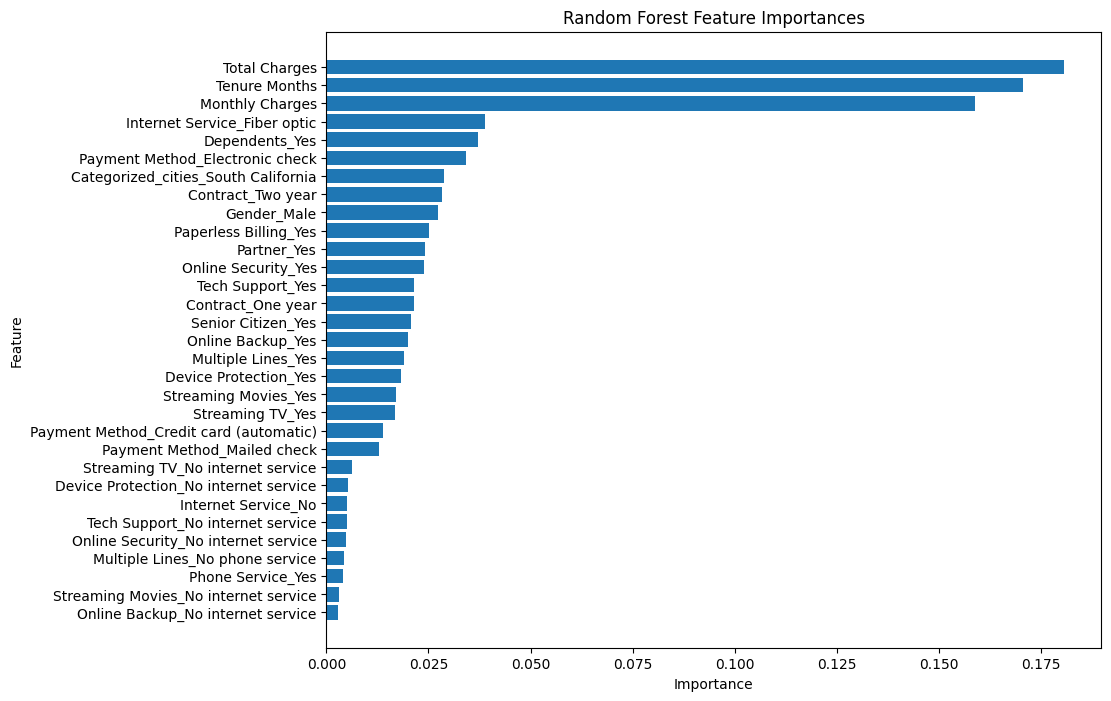

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Initialize and train the random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_churn, y_train_churn)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train_churn.columns

# Create a DataFrame for easy interpretation
rf_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importances")
print(rf_feature_importance)

# Optional: Visualize the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.show()

Linear Regression (for CLTV Prediction):



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
linreg = LinearRegression()
linreg.fit(X_train_cltv, y_train_cltv)

# Predict and evaluate
y_pred_cltv = linreg.predict(X_test_cltv)
print("Linear Regression - CLTV Prediction")
print(f"Mean Squared Error: {mean_squared_error(y_test_cltv, y_pred_cltv):.2f}")
print(f"R^2 Score: {r2_score(y_test_cltv, y_pred_cltv):.2f}")


Linear Regression - CLTV Prediction
Mean Squared Error: 0.84
R^2 Score: 0.16




```
# This is formatted as code
```

**Unsupervised Learning Models**

K-means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



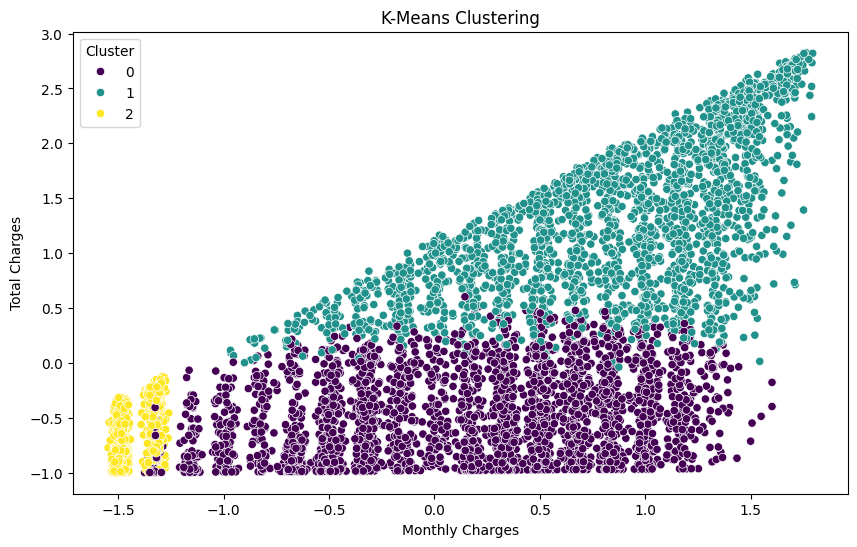

In [ ]:
from sklearn.cluster import KMeans

# Initialize and fit the model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Predict clusters
clusters = kmeans.predict(X)
df_final_drop['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Monthly Charges', y='Total Charges', hue='Cluster', data=df_final_drop, palette='viridis')
plt.title('K-Means Clustering')
plt.show()


PCA for Dimensionality Reduction:



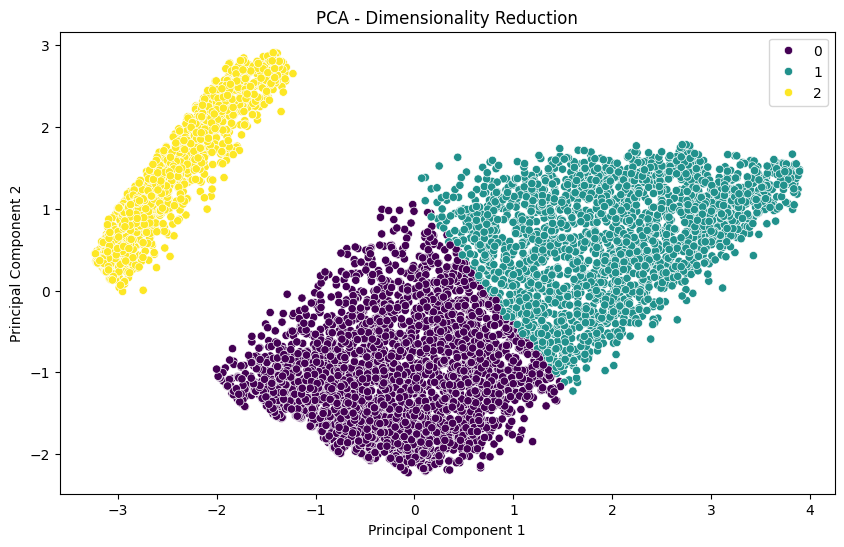

In [ ]:
from sklearn.decomposition import PCA

# Initialize and fit the model
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='viridis')
plt.title('PCA - Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


using smote to balance


In [ ]:
from imblearn.over_sampling import SMOTE
over = SMOTE(random_state = 42, sampling_strategy = 1)

# x = data.drop("Churn Label", axis = 1).values
# y = data['Churn Label'].values

In [ ]:
X_train_churn_smote, y_train_churn_smote = over.fit_resample(X_train_churn, y_train_churn)
# X_train_cltv_smote, y_train_cltv_smote = over.fit_resample(X_train_cltv, y_train_cltv)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the model
logreg = LogisticRegression(max_iter=1000)
log_result = logreg.fit(X_train_churn_smote, y_train_churn_smote)

# Predict and evaluate
y_pred_churn = logreg.predict(X_test_churn)
print("Logistic Regression - Churn Prediction")
print(f"Accuracy: {accuracy_score(y_test_churn, y_pred_churn):.2f}")
print(f"Precision: {precision_score(y_test_churn, y_pred_churn):.2f}")
print(f"Recall: {recall_score(y_test_churn, y_pred_churn):.2f}")
print(f"F1 Score: {f1_score(y_test_churn, y_pred_churn):.2f}")


Logistic Regression - Churn Prediction
Accuracy: 0.78
Precision: 0.59
Recall: 0.76
F1 Score: 0.66


In [ ]:
coefficients = logreg.coef_[0]
feature_importance = np.abs(coefficients)
feature_names = X_train_churn.columns

log_reg_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(log_reg_feature_importance)

                                   Feature  Importance
1                          Monthly Charges    7.493671
10            Internet Service_Fiber optic    5.590632
7                        Phone Service_Yes    3.811808
21                        Streaming TV_Yes    2.381732
23                    Streaming Movies_Yes    2.280346
13                     Online Security_Yes    2.017685
6                           Dependents_Yes    1.829358
19                        Tech Support_Yes    1.823717
8          Multiple Lines_No phone service    1.709054
15                       Online Backup_Yes    1.620165
25                       Contract_Two year    1.577532
0                            Tenure Months    1.555524
17                   Device Protection_Yes    1.345683
9                       Multiple Lines_Yes    1.168721
24                       Contract_One year    1.043876
2                            Total Charges    1.000357
12     Online Security_No internet service    0.781554
14       O


Logistic Regression Coefficients and Odds Ratios
                                   Feature  Coefficient   Odds Ratio
1                          Monthly Charges     7.493671  1796.634617
10            Internet Service_Fiber optic    -5.590632     0.003733
7                        Phone Service_Yes    -3.811808     0.022108
21                        Streaming TV_Yes    -2.381732     0.092390
23                    Streaming Movies_Yes    -2.280346     0.102249
13                     Online Security_Yes    -2.017685     0.132963
6                           Dependents_Yes    -1.829358     0.160517
19                        Tech Support_Yes    -1.823717     0.161425
8          Multiple Lines_No phone service     1.709054     5.523735
15                       Online Backup_Yes    -1.620165     0.197866
25                       Contract_Two year    -1.577532     0.206484
0                            Tenure Months    -1.555524     0.211079
17                   Device Protection_Yes    -1.3456

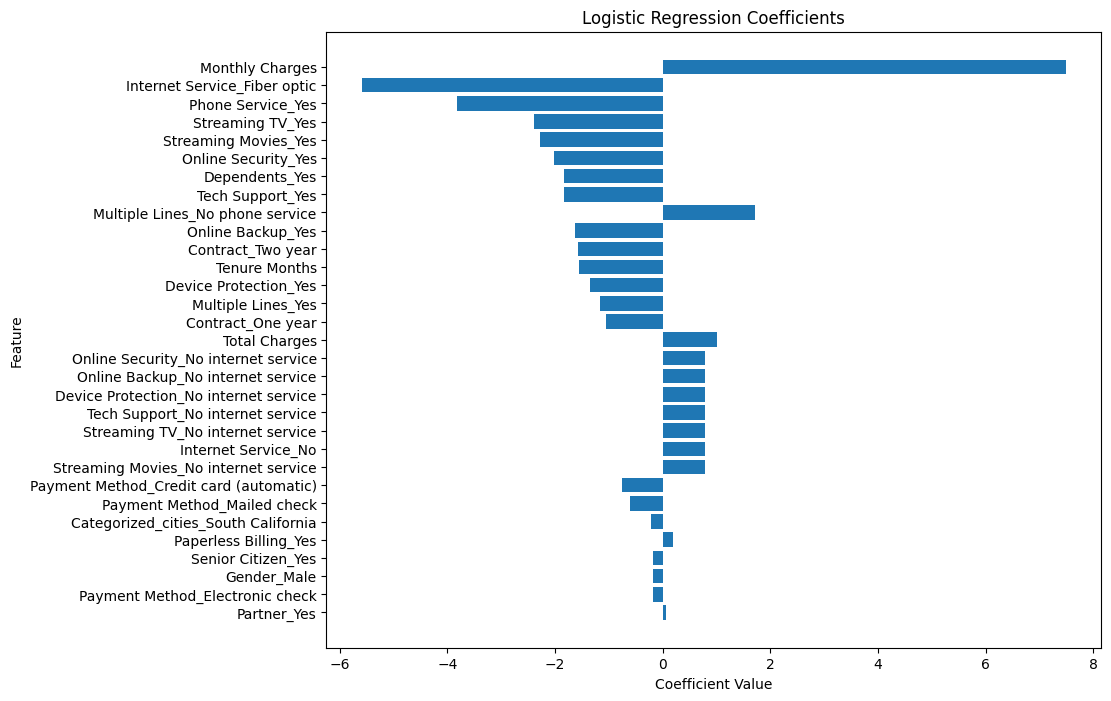

In [ ]:
# Extracting coefficients
coefficients = logreg.coef_[0]
feature_names = X_train_churn.columns

# Create a DataFrame for easy interpretation
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Adding odds ratios for better interpretation
coefficients_df['Odds Ratio'] = np.exp(coefficients_df['Coefficient'])

# Sorting by absolute value of coefficient
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

print("\nLogistic Regression Coefficients and Odds Ratios")
print(coefficients_df)

# Optional: Visualize the coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_churn_smote, y_train_churn_smote)

# Predict and evaluate
y_pred_rf_churn = rf.predict(X_test_churn)
print("Random Forest - Churn Prediction")
print(f"Accuracy: {accuracy_score(y_test_churn, y_pred_rf_churn):.2f}")
print(f"Precision: {precision_score(y_test_churn, y_pred_rf_churn):.2f}")
print(f"Recall: {recall_score(y_test_churn, y_pred_rf_churn):.2f}")
print(f"F1 Score: {f1_score(y_test_churn, y_pred_rf_churn):.2f}")

Random Forest - Churn Prediction
Accuracy: 0.78
Precision: 0.59
Recall: 0.66
F1 Score: 0.62


In [ ]:
df_final_drop

,Tenure Months,Monthly Charges,Total Charges,Churn Value,CLTV,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,...,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Categorized_cities_South California,Cluster
0,-1.238238,-0.364040,-0.959990,1,-0.982225,1,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
1,-1.238238,0.196236,-0.940792,1,-1.437101,0,0,0,1,1,...,0,0,0,0,1,0,1,0,1,0
2,-0.993839,1.158846,-0.645599,1,0.821212,0,0,0,1,1,...,0,1,0,0,1,0,1,0,1,0
3,-0.179175,1.330087,0.336635,1,0.509225,0,0,1,1,1,...,0,1,0,0,1,0,1,0,1,1
4,0.676222,1.293512,1.215021,1,0.794156,1,0,0,1,1,...,0,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,1.613086,-1.451340,-0.381278,0,0.765409,0,0,0,0,1,...,1,0,0,1,1,0,0,0,1,2
7033,-0.342108,0.665072,-0.129226,0,-1.911423,1,0,1,1,1,...,0,1,1,0,1,0,0,1,1,0
7034,1.613086,1.276886,2.241852,0,0.980165,0,0,1,1,1,...,0,1,1,0,1,1,0,0,1,1
7035,-0.871640,-1.170371,-0.854818,0,-1.359315,0,0,1,1,0,...,0,0,0,0,1,0,1,0,1,0


Dropping a few collinearity causing variables

In [ ]:
# data = df_final_drop.drop(['Churn Score','Churn Value','CLTV','CustomerID','Lat Long',
#                   'Latitude','Longitude'], axis = 1)
df_final_drop

,Tenure Months,Monthly Charges,Total Charges,Churn Value,CLTV,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,...,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Categorized_cities_South California,Cluster
0,-1.238238,-0.364040,-0.959990,1,-0.982225,1,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
1,-1.238238,0.196236,-0.940792,1,-1.437101,0,0,0,1,1,...,0,0,0,0,1,0,1,0,1,0
2,-0.993839,1.158846,-0.645599,1,0.821212,0,0,0,1,1,...,0,1,0,0,1,0,1,0,1,0
3,-0.179175,1.330087,0.336635,1,0.509225,0,0,1,1,1,...,0,1,0,0,1,0,1,0,1,1
4,0.676222,1.293512,1.215021,1,0.794156,1,0,0,1,1,...,0,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,1.613086,-1.451340,-0.381278,0,0.765409,0,0,0,0,1,...,1,0,0,1,1,0,0,0,1,2
7033,-0.342108,0.665072,-0.129226,0,-1.911423,1,0,1,1,1,...,0,1,1,0,1,0,0,1,1,0
7034,1.613086,1.276886,2.241852,0,0.980165,0,0,1,1,1,...,0,1,1,0,1,1,0,0,1,1
7035,-0.871640,-1.170371,-0.854818,0,-1.359315,0,0,1,1,0,...,0,0,0,0,1,0,1,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Separate features and target variable
X_1 = df_final_drop.drop('Churn Value', axis=1)
y_1 = df_final_drop['Churn Value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.4, random_state=42)

# Initialize a dictionary to store confusion matrices for different kernels
confusion_matrices = {}
classification_reports = {}

# Define different kernels to be used in SVM
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    # Initialize and train the SVM model
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Generate the confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, output_dict=True)

    # Store the results
    confusion_matrices[kernel] = cm
    classification_reports[kernel] = cr

# Convert classification reports to DataFrames for better visualization
cr_df = pd.DataFrame(classification_reports)

for kernel in kernels:
    print(f"Kernel: {kernel}")
    print("Confusion Matrix:")
    print(confusion_matrices[kernel])
    print("Classification Report:")
    print(classification_reports[kernel])
    print("\n")

Kernel: linear
Confusion Matrix:
[[1838  197]
 [ 338  442]]
Classification Report:
{'0': {'precision': 0.8446691176470589, 'recall': 0.9031941031941032, 'f1-score': 0.8729517929232963, 'support': 2035}, '1': {'precision': 0.6917057902973396, 'recall': 0.5666666666666667, 'f1-score': 0.6229739252995067, 'support': 780}, 'accuracy': 0.8099467140319716, 'macro avg': {'precision': 0.7681874539721992, 'recall': 0.734930384930385, 'f1-score': 0.7479628591114015, 'support': 2815}, 'weighted avg': {'precision': 0.8022849629995344, 'recall': 0.8099467140319716, 'f1-score': 0.8036861670808253, 'support': 2815}}


Kernel: poly
Confusion Matrix:
[[1889  146]
 [ 408  372]]
Classification Report:
{'0': {'precision': 0.8223770134958641, 'recall': 0.9282555282555283, 'f1-score': 0.8721144967682363, 'support': 2035}, '1': {'precision': 0.7181467181467182, 'recall': 0.47692307692307695, 'f1-score': 0.5731895223420648, 'support': 780}, 'accuracy': 0.8031971580817051, 'macro avg': {'precision': 0.77026186

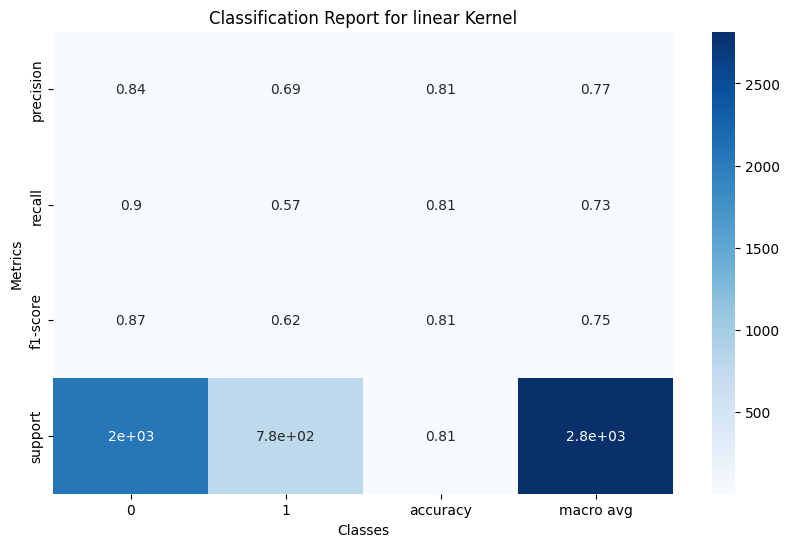

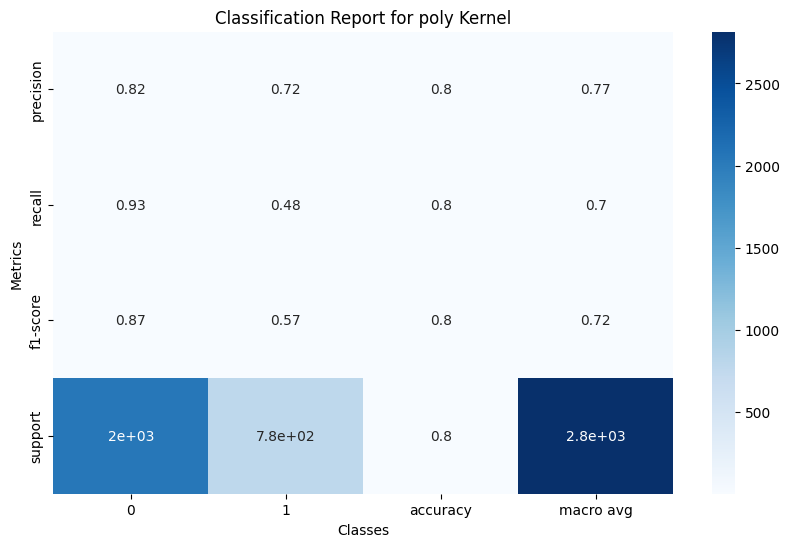

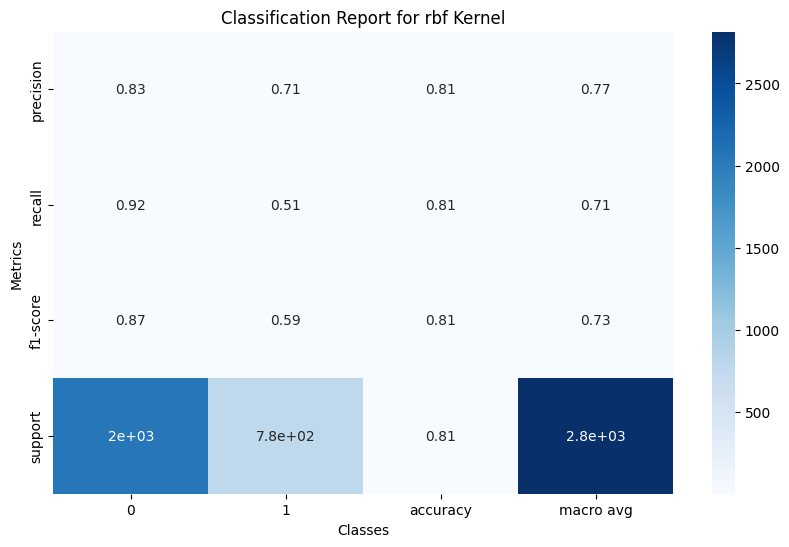

Kernel: linear
Overall Performance Metrics:
Accuracy: 0.81

Class-wise Performance Metrics:

Class 0:
Precision: 0.84
Recall: 0.90
F1 Score: 0.87

Class 1:
Precision: 0.69
Recall: 0.57
F1 Score: 0.62


Kernel: poly
Overall Performance Metrics:
Accuracy: 0.80

Class-wise Performance Metrics:

Class 0:
Precision: 0.82
Recall: 0.93
F1 Score: 0.87

Class 1:
Precision: 0.72
Recall: 0.48
F1 Score: 0.57


Kernel: rbf
Overall Performance Metrics:
Accuracy: 0.81

Class-wise Performance Metrics:

Class 0:
Precision: 0.83
Recall: 0.92
F1 Score: 0.87

Class 1:
Precision: 0.71
Recall: 0.51
F1 Score: 0.59




In [ ]:
# Visualize the classification reports
def plot_classification_report(cr, title='Classification Report'):
    """Plot classification report."""
    cr_df = pd.DataFrame(cr).transpose()
    plt.figure(figsize=(10, 6))
    sns.heatmap(cr_df.iloc[:-1, :].T, annot=True, cmap='Blues')
    plt.title(title)
    plt.ylabel('Metrics')
    plt.xlabel('Classes')
    plt.show()

for kernel in kernels:
    plot_classification_report(classification_reports[kernel], title=f'Classification Report for {kernel} Kernel')

# Interpretation code
def interpret_classification_report(cr):
    """Interpret the classification report."""
    print("Overall Performance Metrics:")
    accuracy = cr['accuracy']
    print(f"Accuracy: {accuracy:.2f}")

    print("\nClass-wise Performance Metrics:")
    for label, metrics in cr.items():
        if label in ['0', '1']:
            print(f"\nClass {label}:")
            print(f"Precision: {metrics['precision']:.2f}")
            print(f"Recall: {metrics['recall']:.2f}")
            print(f"F1 Score: {metrics['f1-score']:.2f}")

for kernel in kernels:
    print(f"Kernel: {kernel}")
    interpret_classification_report(classification_reports[kernel])
    print("\n")


SVM with Linear Kernel Coefficients and Odds Ratios
                                   Feature  Coefficient  Odds Ratio
11            Internet Service_Fiber optic     0.619115    1.857284
0                            Tenure Months    -0.489745    0.612783
7                           Dependents_Yes    -0.426006    0.653112
2                            Total Charges    -0.360646    0.697226
1                          Monthly Charges    -0.243249    0.784076
24                    Streaming Movies_Yes     0.157371    1.170430
25                       Contract_One year    -0.153960    0.857306
27                   Paperless Billing_Yes     0.145725    1.156878
10                      Multiple Lines_Yes     0.140872    1.151277
22                        Streaming TV_Yes     0.134320    1.143759
6                              Partner_Yes     0.114107    1.120872
29         Payment Method_Electronic check     0.112571    1.119152
14                     Online Security_Yes    -0.091981    0.91

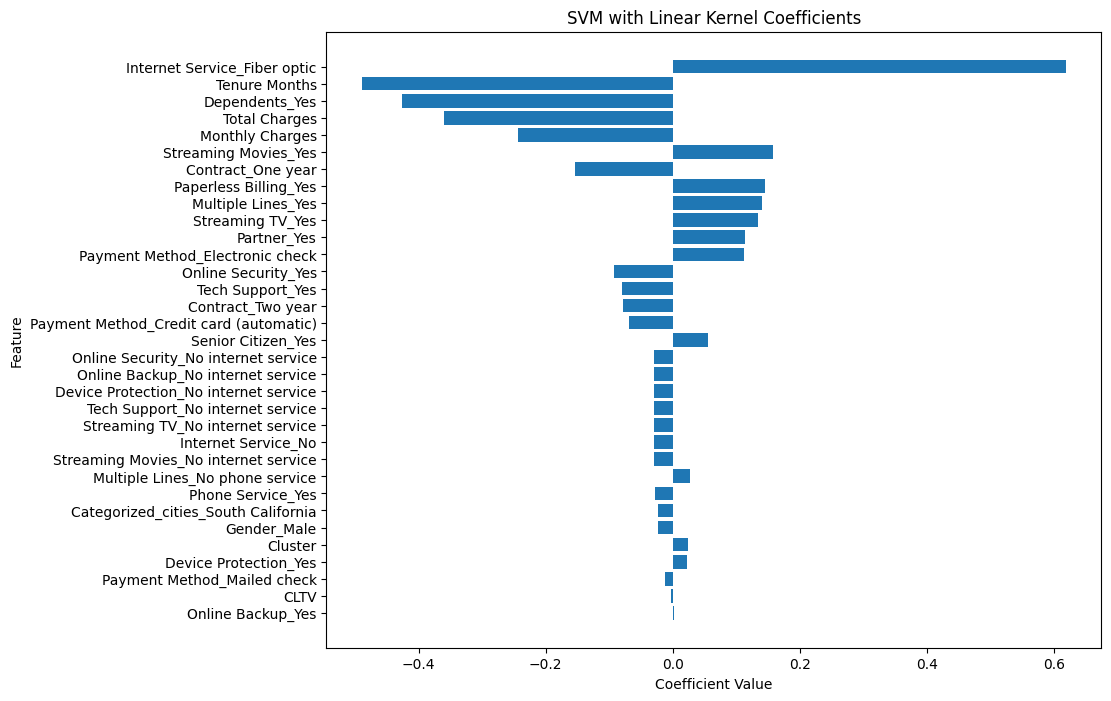

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X_1 = df_final_drop.drop('Churn Value', axis=1)
y_1 = df_final_drop['Churn Value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Extract coefficients
coefficients = svm_linear.coef_[0]
feature_names = X_1.columns

# Create a DataFrame for easy interpretation
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Adding odds ratios for better interpretation (optional, similar to logistic regression)
coefficients_df['Odds Ratio'] = np.exp(coefficients_df['Coefficient'])

# Sorting by absolute value of coefficient
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

print("\nSVM with Linear Kernel Coefficients and Odds Ratios")
print(coefficients_df)

# Optional: Visualize the coefficients
plt.figure(figsize=(10, 8))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('SVM with Linear Kernel Coefficients')
plt.gca().invert_yaxis()
plt.show()


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_churn)
X_test_scaled = scaler.transform(X_test_churn)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['linear', 'poly', 'rbf']
}

# Create a pipeline with a scaler and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, refit=True, verbose=3, cv=5)

# Fit the model
grid_search.fit(X_train_churn, y_train_churn)

# Print the best parameters and estimator
print("Best Parameters: ", grid_search.best_params_)
print("Best Estimator: ", grid_search.best_estimator_)

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_churn)

# Plot confusion matrix for the best model
plot_confusion_matrix(y_test_churn, y_pred_best, 'Best SVM Model')

# Print classification report for the best model
print(classification_report(y_test_churn, y_pred_best))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END svc__C=0.1, svc__gamma=1, svc__kernel=linear;, score=0.823 total time=   0.8s
[CV 2/5] END svc__C=0.1, svc__gamma=1, svc__kernel=linear;, score=0.804 total time=   0.9s
[CV 3/5] END svc__C=0.1, svc__gamma=1, svc__kernel=linear;, score=0.798 total time=   0.8s
[CV 4/5] END svc__C=0.1, svc__gamma=1, svc__kernel=linear;, score=0.795 total time=   0.7s
[CV 5/5] END svc__C=0.1, svc__gamma=1, svc__kernel=linear;, score=0.797 total time=   0.9s
[CV 1/5] END svc__C=0.1, svc__gamma=1, svc__kernel=poly;, score=0.734 total time=  45.4s
[CV 2/5] END svc__C=0.1, svc__gamma=1, svc__kernel=poly;, score=0.747 total time=  58.1s
[CV 3/5] END svc__C=0.1, svc__gamma=1, svc__kernel=poly;, score=0.744 total time=  53.5s
[CV 4/5] END svc__C=0.1, svc__gamma=1, svc__kernel=poly;, score=0.716 total time=  47.1s
[CV 5/5] END svc__C=0.1, svc__gamma=1, svc__kernel=poly;, score=0.698 total time=  51.2s
[CV 1/5] END svc__C=0.1, svc__gamma=1,

NameError: name 'plot_confusion_matrix' is not defined

STOP HERE

STOP HERE

STOP HERE

STOP HERE

STOP HERE

STOP HERE

DATA MODELING STARTS HERE AND **IGNORE EVERYTHING** BELOW THIS POINT

In [ ]:
# Check missing values
missing_values = df.isnull().sum()
missing_values

#df_cleaned_new = df.dropna()

#missing_values = df_cleaned_new.isnull().sum()
#missing_values

In [ ]:
# column_to_update = 'Churn Reason'  # Replace with your actual column name
# replacement_value = 'not_left'       # Replace with the value you want to use for blanks

# # Replace NaNs with the specified value
# df[column_to_update] = df[column_to_update].fillna(replacement_value)

# # Replace empty strings with the specified value
# df[column_to_update] = df[column_to_update].replace('', replacement_value)

In [ ]:
df_cleaned_new.info()
df_cleaned_new

In [ ]:
# Create a subset of categorical variables
df_cat = df_cleaned_new.select_dtypes(include='object')
df_cat.columns

Check unique value for each categorical variables

In [ ]:
df_cleaned_new['City'].unique()

In [ ]:
len(df_cleaned_new['City'].unique())

In [ ]:
df_cleaned_new['Gender'].unique()

In [ ]:
df_cleaned_new['Senior Citizen'].unique()

In [ ]:
df_cleaned_new['Partner'].unique()

In [ ]:
df_cleaned_new['Dependents'].unique()

In [ ]:
df_cleaned_new['Phone Service'].unique()

In [ ]:
df_cleaned_new['Multiple Lines'].unique()

In [ ]:
df_cleaned_new['Internet Service'].unique()

In [ ]:
df_cleaned_new['Online Security'].unique()

In [ ]:
df_cleaned_new['Online Backup'].unique()

In [ ]:
df_cleaned_new['Device Protection'].unique()

In [ ]:
df_cleaned_new['Tech Support'].unique()

In [ ]:
df_cleaned_new['Streaming TV'].unique()

In [ ]:
df_cleaned_new['Streaming Movies'].unique()

In [ ]:
df_cleaned_new['Contract'].unique()

In [ ]:
df_cleaned_new['Paperless Billing'].unique()

In [ ]:
df_cleaned_new['Payment Method'].unique()

In [ ]:
df_cleaned_new['Churn Reason'].unique()

Visualization for Categorical Variables

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical variables
categorical_vars = ['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
                    'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection',
                    'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
                    'Payment Method', 'Churn Reason']

# Loop through the list of categorical variables and create a bar plot for each
for var in categorical_vars:
    plt.figure(figsize=(10, 6))  # Set the size of each individual plot
    sns.countplot(data=df_cleaned_new, y=var)  # Create a countplot for the current variable
    plt.title(f'Distribution of {var}')  # Set the title for the current plot
    plt.xticks(rotation=90)
    plt.show()  # Show the plot

Visualization for Numerical variables

Converting to binary values

In [ ]:
# sns.set(style="whitegrid")

# # Create the plot
# plt.figure(figsize=(10, 8))
# ax = sns.countplot(data=df_cleaned_new, y='Churn Category', order=df['Churn Category'].value_counts().index)
# ax.set_title('Distribution of Churn Category')
# ax.set_xlabel('Count')
# ax.set_ylabel('Churn Category')

# # Improve layout to make room for labels
# plt.tight_layout()

# # Show the plot
# plt.show()

In [ ]:
categorical_vars = ['City', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Total Charges', 'Churn Label', 'Churn Reason']



In [ ]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df_cleaned_new, y='Churn Reason', order=df_cleaned_new['Churn Reason'].value_counts().index)
ax.set_title('Distribution of Churn Reasons')
ax.set_xlabel('Count')
ax.set_ylabel('Churn Reasons')

# Improve layout to make room for labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df['Churn Reason'].unique()

In [ ]:
df_cleaned_new['Churn Category'].unique()

In [ ]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df_cleaned_new, y='Churn Category', order=df_cleaned_new['Churn Category'].value_counts().index)
ax.set_title('Distribution of Churn Category')
ax.set_xlabel('Count')
ax.set_ylabel('Churn Category')

# Improve layout to make room for labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# NoCal_cities = [
#     "San Francisco", "Oakland", "Berkeley", "San Jose", "Sacramento", "Fresno", "Napa", "Santa Rosa", "Stockton",
#     "Palo Alto", "Mountain View", "Sunnyvale", "San Mateo", "Redwood City", "Pleasanton", "Livermore", "San Ramon",
#     "Walnut Creek", "Vallejo", "Fairfield", "Concord", "Antioch", "Daly City", "Modesto", "Salinas", "Santa Cruz",
#     "Monterey", "San Rafael", "Petaluma", "South San Francisco", "Redding", "Chico", "Yuba City", "Eureka", "Santa Clara",
#     "Los Gatos", "Cupertino", "San Bruno", "San Leandro", "Novato", "Madera", "Sonoma", "Healdsburg", "Mendocino",
#     "Fort Bragg", "Visalia", "Merced", "Turlock", "Mojave", "Bishop", "Lodi", "San Luis Obispo", "Carmel", "Big Sur",
#     "Lompoc", "Santa Barbara", "Bakersfield"
# ]

# SoCal_cities = [
#     "Los Angeles", "San Diego", "Long Beach", "Santa Ana", "Anaheim", "Irvine", "Glendale", "Huntington Beach",
#     "Santa Monica", "Riverside", "San Bernardino", "Chula Vista", "Oxnard", "Garden Grove", "Ontario", "Corona",
#     "Moreno Valley", "Escondido", "Pasadena", "Orange", "Fullerton", "Thousand Oaks", "Simi Valley", "Ventura",
#     "El Monte", "West Covina", "Burbank", "Compton", "Santa Clarita", "Whittier", "Lancaster", "Palm Springs",
#     "Palmdale", "Laguna Beach", "Newport Beach", "Hermosa Beach", "Redondo Beach", "San Clemente", "La Jolla",
#     "El Cajon", "Pomona", "Torrance", "Alhambra", "Carlsbad", "Temecula", "Vista", "Camarillo", "Hesperia", "Indio",
#     "Victorville", "Murrieta", "Mission Viejo", "Oceanside", "Del Mar", "Malibu", "West Hollywood"
# ]

# Note: This is not a complete list and may require adjustments based on specific city locations and preferences.
# Example DataFrame creation
# data = {'City': ['Los Angeles', 'San Francisco', 'San Diego', 'Fresno', 'Eureka', 'Santa Barbara', 'Bakersfield']}
# df = pd.DataFrame(data)

# # Function to determine region based on city
# def assign_region(city):
#     if city in NoCal_cities:
#         return "NoCal"
#     elif city in SoCal_cities:
#         return "SoCal"
#     else:
#         return "Unknown"  # For cities not listed in the arrays

# # Applying the function to the DataFrame
# df['Region'] = df['City'].apply(assign_region)

# # Display the DataFrame to verify changes
# print(df)

In [ ]:
converting = ['Senior Citizen', 'Partner', 'Dependents' ,'Phone Service', 'Paperless Billing']
for column in converting:
    df_cleaned_new[column + '_Binary'] = df_cleaned_new[column].map({'Yes': 1, 'No': 0})
df_cleaned_new

In [ ]:
# so_cal = [
#     'Adelanto', 'Agoura Hills', 'Alhambra', 'Aliso Viejo', 'Anaheim', 'Arcadia', 'Artesia', 'Avalon', 'Azusa', 'Baldwin Park',
#     'Banning', 'Beaumont', 'Bell', 'Bell Gardens', 'Bellflower', 'Beverly Hills', 'Blythe', 'Bradbury', 'Brea', 'Buena Park',
#     'Burbank', 'Calabasas', 'Calimesa', 'Canyon Lake', 'Carlsbad', 'Carson', 'Cathedral City', 'Cerritos', 'Chino', 'Chino Hills',
#     'Chula Vista', 'Claremont', 'Coachella', 'Colton', 'Commerce', 'Corona', 'Costa Mesa', 'Covina', 'Cudahy', 'Culver City',
#     'Cypress', 'Dana Point', 'Desert Hot Springs', 'Diamond Bar', 'Downey', 'Duarte', 'Eastvale', 'El Cajon', 'El Centro',
#     'El Monte', 'El Segundo', 'Encinitas', 'Escondido', 'Fountain Valley', 'Fullerton', 'Garden Grove', 'Gardena', 'Glendale',
#     'Glendora', 'Hawaiian Gardens', 'Hawthorne', 'Hemet', 'Hermosa Beach', 'Hidden Hills', 'Hesperia', 'Highland', 'Huntington Beach',
#     'Huntington Park', 'Indian Wells', 'Indio', 'Industry', 'Inglewood', 'Irvine', 'Irwindale', 'Jurupa Valley', 'La Cañada Flintridge',
#     'La Habra', 'La Habra Heights', 'La Mesa', 'La Mirada', 'La Palma', 'La Puente', 'La Quinta', 'La Verne', 'Laguna Beach',
#     'Laguna Hills', 'Laguna Niguel', 'Laguna Woods', 'Lake Elsinore', 'Lake Forest', 'Lakewood', 'Lancaster', 'Lawndale', 'Lemon Grove',
#     'Lomita', 'Long Beach', 'Los Alamitos', 'Los Angeles', 'Lynwood', 'Malibu', 'Manhattan Beach', 'Maywood', 'Menifee', 'Mission Viejo',
#     'Monrovia', 'Montclair', 'Montebello', 'Monterey Park', 'Moreno Valley', 'Murrieta', 'National City', 'Needles', 'Newport Beach',
#     'Norco', 'Norwalk', 'Oceanside', 'Ontario', 'Orange', 'Oxnard', 'Palm Desert', 'Palm Springs', 'Palmdale', 'Palos Verdes Estates',
#     'Paramount', 'Pasadena', 'Perris', 'Pico Rivera', 'Placentia', 'Pomona', 'Rancho Cucamonga', 'Rancho Mirage', 'Rancho Palos Verdes',
#     'Rancho Santa Margarita', 'Redlands', 'Redondo Beach', 'Rialto', 'Riverside', 'Rosemead', 'San Bernardino', 'San Clemente',
#     'San Diego', 'San Dimas', 'San Fernando', 'San Gabriel', 'San Jacinto', 'San Juan Capistrano', 'San Marcos', 'San Marino',
#     'Santa Ana', 'Santa Barbara', 'Santa Clarita', 'Santa Fe Springs', 'Santa Maria', 'Santa Monica', 'Santa Paula', 'Santee',
#     'Seal Beach', 'Sierra Madre', 'Signal Hill', 'Simi Valley', 'Solana Beach', 'Solvang', 'South El Monte', 'South Gate',
#     'South Pasadena', 'Stanton', 'Temecula', 'Temple City', 'Thousand Oaks', 'Torrance', 'Tustin', 'Twentynine Palms', 'Upland',
#     'Ventura', 'Vernon', 'Victorville', 'Villa Park', 'Walnut', 'West Covina', 'West Hollywood', 'Westlake Village', 'Westminster',
#     'Whittier', 'Wildomar', 'Yorba Linda'
# ]

# no_cal = [
#     'Alameda', 'Albany', 'American Canyon', 'Antioch', 'Arcata', 'Atascadero', 'Atherton', 'Auburn', 'Belmont', 'Belvedere',
#     'Benicia', 'Berkeley', 'Blue Lake', 'Brentwood', 'Brisbane', 'Burlingame', 'Calistoga', 'Campbell', 'Capitola', 'Carmel',
#     'Chico', 'Cloverdale', 'Colma', 'Concord', 'Corte Madera', 'Cotati', 'Crescent City', 'Cupertino', 'Daly City', 'Davis',
#     'Del Rey Oaks', 'Dixon', 'Dublin', 'East Palo Alto', 'El Cerrito', 'Emeryville', 'Eureka', 'Fairfax', 'Fairfield', 'Ferndale',
#     'Folsom', 'Fort Bragg', 'Foster City', 'Fremont', 'Gilroy', 'Gonzales', 'Grass Valley', 'Greenfield', 'Half Moon Bay', 'Hayward',
#     'Healdsburg', 'Hercules', 'Hillsborough', 'Hollister', 'King City', 'Lafayette', 'Larkspur', 'Livermore', 'Lodi', 'Loomis',
#     'Los Altos', 'Los Altos Hills', 'Los Gatos', 'Martinez', 'Menlo Park', 'Mill Valley', 'Millbrae', 'Milpitas', 'Monte Sereno',
#     'Monterey', 'Morgan Hill', 'Mountain View', 'Napa', 'Newark', 'Novato', 'Oakland', 'Oakley', 'Orinda', 'Pacifica', 'Pacific Grove',
#     'Palo Alto', 'Petaluma', 'Piedmont', 'Pinole', 'Pittsburg', 'Pleasant Hill', 'Pleasanton', 'Portola', 'Portola Valley', 'Redding',
#     'Redwood City', 'Richmond', 'Rio Vista', 'Rohnert Park', 'Ross', 'St. Helena', 'Salinas', 'San Anselmo', 'San Bruno', 'San Carlos',
#     'San Francisco', 'San Jose', 'San Leandro', 'San Mateo', 'San Pablo', 'San Rafael', 'San Ramon', 'Santa Clara', 'Santa Cruz',
#     'Santa Rosa', 'Saratoga', 'Sausalito', 'Scotts Valley', 'Sebastopol', 'Shasta Lake', 'Sonoma', 'South San Francisco', 'Stockton',
#     'Suisun City', 'Sunnyvale', 'Tiburon', 'Tracy', 'Trinidad', 'Union City', 'Vacaville', 'Vallejo', 'Walnut Creek', 'Watsonville',
#     'Windsor', 'Woodside', 'Yountville'
# ]
# len(so_cal) + len(no_cal)

In [ ]:
df_cleaned_new['Categorized_cities'].unique()

In [ ]:
df_cleaned_new['Categorized_cities'].value_counts()

DON'T CHANGE ANYTHING ABOVE THIS POINT

In [ ]:
# Create a new column 'No internet service' with a boolean value
df_testing = df_cleaned_new
# df_testing['No internet service'] = df_testing['Internet Service'].apply(lambda x: 'Yes' if x == 'No' else 'Yes')
# df_testing['No internet service'].value_counts()
# Update the values in the specified columns to 'Invalid' where 'No internet service' is 'Yes'
# df_testing.loc[df['No internet service'] == 'Yes', ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']] = 'Invalid'


In [ ]:
df_testing['No_service'] = df_testing[['Online Security', 'Online Backup', 'Device Protection', 'Tech Support','Streaming TV','Streaming Movies']].apply(lambda row: 'No internet service' if 'No internet service' in row.values else 'Has internet service', axis=1)
df_testing
df_testing['No_service'].value_counts()